# Investigate A Dataset- Gapminder World: Factors Contributing to Child Mortality Rates

By: Denver R. Headings Cantu

## Introduction

**Overview**

In this data analysis project I will be pulling data from the Gapminder World datasets.

**The following datasets will be used in the analysis from Gapminder:**

* child_mortality_0_5_year_olds_dying_per_1000_born 
* government_share_of_total_health_spending_percent
* income_per_person_gdppercapita_ppp_inflation_adjusted
* population_total.

**Through these datasets I will answer the following questions:**

1. How did the child mortality rate change over the years?
2. Which countries hold the highest rates of mortality?
3. Does government share of health care spending have an effect on the mortality rate?
4. Is there a relationship between income and child mortality?
5. Do countries with higher or lower populations have higher mortality rates?



In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import missingno as ms
import pycountry #show country codes to country names
import pycountry_convert #convert country codes
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Cleaning and Wrangling

Now we will begin the process of cleaning and wrangling our data to be used for analysis. I will use Pandas and Missingo help explore the datasets and wrangle the data into clean dataframes. First we will load and look at the child mortality rates file.

In [2]:
#loading the csv file and storing it in 'df'
df = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')

#printing first five rows for initial view of data
df.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
2,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13


First I loaded the child mortality rates csv file and took a look at the header. This dataset is showing the child mortality rates per 1000 people in the respective country.

At first glance we can see this dataset contains data from a large number of years starting from 1799 all the way to 2099. 

Next I will get the dataframe info and shape to see what the beginning parameters look like.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2099
dtypes: float64(301), object(1)
memory usage: 464.9+ KB


In [4]:
print(df.shape)

(197, 302)


In order to start organizing this data for analysis I need to melt or pivot the data so that the year header becomes its own column.


In [5]:
#melting the dataframe to pivot the year column
mortality_melt = pd.melt(df, id_vars=["country"], var_name="year", value_name= "mortality rate")

#sort values by country and year
mortality_melt.sort_values(["country", "year"], inplace = True)

#showing the head of the dataframe
mortality_melt.head()


,country,year,mortality rate
0,Afghanistan,1799,469.0
197,Afghanistan,1800,469.0
394,Afghanistan,1801,469.0
591,Afghanistan,1802,469.0
788,Afghanistan,1803,469.0


In [6]:
#Print the shape of the dataframe
print(mortality_melt.shape)

(59297, 3)


We can see above, the dataframe shape now has 3 columns and 59,297 rows.

Next I want to go ahead and remove the rows that will not be needed for this analysis, which will also make organizing and cleaning the data easier. I have decided to only analyze years 1980 - 2018, in which 1990-2018 include the actual data the dataset was modeled from.

*Our global trend for Child mortality rate is using the UN IGME data for the period 1990 to 2018.*
https://www.gapminder.org/data/documentation/gd005/

In [7]:
#checking the dataframe data types
mortality_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         59297 non-null  object 
 1   year            59297 non-null  object 
 2   mortality rate  57497 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.8+ MB


In [8]:
#converting year dtype object to int
mortality_melt['year'] = pd.to_numeric(mortality_melt['year'])

#Filtering the dataframe for years between 1980 and 2018
mortality_melt = mortality_melt[(mortality_melt.year >= 1980) & (mortality_melt.year < 2019)]


#Show the new head of the datafram
mortality_melt.head(10)


,country,year,mortality rate
35657,Afghanistan,1980,238.0
35854,Afghanistan,1981,231.0
36051,Afghanistan,1982,225.0
36248,Afghanistan,1983,218.0
36445,Afghanistan,1984,211.0
36642,Afghanistan,1985,205.0
36839,Afghanistan,1986,198.0
37036,Afghanistan,1987,192.0
37233,Afghanistan,1988,185.0
37430,Afghanistan,1989,179.0


In [9]:
mortality_melt['year'].min()

1980

In [10]:
mortality_melt['year'].max()

2018

Here we can see that the years have filtered properly and our new dataframe is showing years from 1980 - 2018.

In [11]:
print(mortality_melt.shape)

(7683, 3)


We can see above that our dataframe has been reduced significantly with now only 7,683 rows.

Next we will check for any null values.

In [12]:
mortality_melt.isnull().sum()

country           0
year              0
mortality rate    0
dtype: int64

There are no null entries in the dataframe. Now we can move on to the next file and repeat the process for the government spending file.

## Dataset 2: Government Spending Percentage of Healthcare

In [13]:
df_2 = pd.read_csv('government_share_of_total_health_spending_percent.csv')

#printing first five rows
df_2.head()

,country,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.62,6.83,7.81,11.6,11.8,12.2,11.8,11.6,11.7
1,Angola,86.8,76.9,77.9,73.0,74.2,79.2,85.5,78.80,81.10,76.00,74.5,79.3,80.2,84.3,89.9,82.5
2,Albania,50.0,39.6,39.2,39.5,43.3,36.1,38.2,36.10,35.90,39.70,40.2,39.4,38.2,39.6,41.2,39.0
3,Andorra,64.4,65.2,66.2,72.0,66.2,64.8,68.8,68.80,68.60,69.20,69.1,70.4,69.8,69.9,70.1,70.1
4,United Arab Emirates,79.0,79.3,78.3,67.3,66.0,65.1,78.3,63.10,63.20,59.10,59.0,59.4,59.6,66.0,76.9,74.4


In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  192 non-null    object 
 1   1994     189 non-null    float64
 2   1995     190 non-null    float64
 3   1996     190 non-null    float64
 4   1997     191 non-null    float64
 5   1998     191 non-null    float64
 6   1999     191 non-null    float64
 7   2000     191 non-null    float64
 8   2001     190 non-null    float64
 9   2002     190 non-null    float64
 10  2003     190 non-null    float64
 11  2004     190 non-null    float64
 12  2005     190 non-null    float64
 13  2006     190 non-null    float64
 14  2007     190 non-null    float64
 15  2008     190 non-null    float64
 16  2009     187 non-null    float64
dtypes: float64(16), object(1)
memory usage: 25.6+ KB


In [15]:
print(df_2.shape)

(192, 17)


We can see from the above two pieces of code that our data here is much more limited than our mortality file. The government spending file only contains data for years 1994 - 2009, and that the range that contains the most years and values are from 2001 - 2008. We will keep this in mind for later.

In [16]:
#melting the dataframe to pivot the year column
spending_melt = pd.melt(df_2, id_vars=["country"], var_name="year", value_name= "spending rate")

#sort values by country and year
spending_melt.sort_values(["country", "year"], inplace = True)


#show the head of the dataframe
spending_melt.head()

,country,year,spending rate
0,Afghanistan,1994,NaN
192,Afghanistan,1995,NaN
384,Afghanistan,1996,NaN
576,Afghanistan,1997,NaN
768,Afghanistan,1998,NaN


In [17]:
spending_melt['year'] = pd.to_numeric(spending_melt['year'])

In [18]:
spending_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3072 entries, 0 to 3071
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3072 non-null   object 
 1   year           3072 non-null   int64  
 2   spending rate  3040 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 96.0+ KB


The dataframe info shows that there are 32 missing rows in the spending rate column. We need to figure out which countries and what years contain the nulls. 

In [19]:
spending_melt.isnull().sum()

country           0
year              0
spending rate    32
dtype: int64

In [20]:
is_nan = spending_melt[spending_melt.isnull().any(axis=1)]
print(is_nan)

          country  year  spending rate
0     Afghanistan  1994            NaN
192   Afghanistan  1995            NaN
384   Afghanistan  1996            NaN
576   Afghanistan  1997            NaN
768   Afghanistan  1998            NaN
960   Afghanistan  1999            NaN
1152  Afghanistan  2000            NaN
2953     Honduras  2009            NaN
81           Iraq  1994            NaN
98        Liberia  1994            NaN
290       Liberia  1995            NaN
482       Liberia  1996            NaN
2991       Mexico  2009            NaN
3007    Nicaragua  2009            NaN
1500      Somalia  2001            NaN
1692      Somalia  2002            NaN
1884      Somalia  2003            NaN
2076      Somalia  2004            NaN
2268      Somalia  2005            NaN
2460      Somalia  2006            NaN
2652      Somalia  2007            NaN
2844      Somalia  2008            NaN
3036      Somalia  2009            NaN
1535     Zimbabwe  2001            NaN
1727     Zimbabwe  2002  

Above we can see all of the NaN entries and their country. 
    



In [21]:
item_counts = is_nan["country"].value_counts()
print(item_counts)

Zimbabwe       9
Somalia        9
Afghanistan    7
Liberia        3
Iraq           1
Mexico         1
Nicaragua      1
Honduras       1
Name: country, dtype: int64


I need to decide what data I am going to keep in this dataframe. Though, I am going to wait until later in the cleaning process to remove the rows with NaN values.

### Joining the spending rate dataframe with mortality rate dataframe

Next I will join the two dataframes and continue the cleaning process with the next file.

In [22]:
mortality_spending = pd.merge(mortality_melt, spending_melt, on =["country", "year"], how ='left')

In [23]:
mortality_spending.head()

,country,year,mortality rate,spending rate
0,Afghanistan,1980,238.0,NaN
1,Afghanistan,1981,231.0,NaN
2,Afghanistan,1982,225.0,NaN
3,Afghanistan,1983,218.0,NaN
4,Afghanistan,1984,211.0,NaN


## Dataset 3: Income Per Person

Next we will move on to the income per person file and being inspecting its contents and repeat some of the cleaning processes used earlier.

In [24]:
#loading the csv file and storing it in 'df_3'
df_3 = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

#printing first five rows
df_3.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310
2,Albania,667,667,667,667,667,668,668,668,668,...,19.4k,19.8k,20.2k,20.6k,21k,21.5k,21.9k,22.3k,22.8k,23.3k
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73.6k,75.1k,76.7k,78.3k,79.8k,81.5k,83.1k,84.8k,86.5k,88.3k
4,United Arab Emirates,998,1000,1010,1010,1010,1020,1020,1020,1030,...,66.8k,68.1k,69.4k,70.8k,72.2k,73.7k,75.2k,76.7k,78.3k,79.9k


In [25]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 242 entries, country to 2039
dtypes: int64(85), object(157)
memory usage: 368.8+ KB


In [26]:
df_3.shape

(195, 242)

In [27]:
#melting the dataframe to pivot the year column
income_melt = pd.melt(df_3, id_vars=["country"], var_name="year", value_name= "income per person")

#sort values by country and year
income_melt.sort_values(["country", "year"], inplace = True)

#showing the head of the dataframe
income_melt.head()

,country,year,income per person
0,Afghanistan,1799,603
195,Afghanistan,1800,603
390,Afghanistan,1801,603
585,Afghanistan,1802,603
780,Afghanistan,1803,603


In [28]:
#convert year to int
income_melt['year'] = pd.to_numeric(income_melt['year'])
#filter the dataframe to match the years selected in the child mortality rate dataframe.
income_melt = income_melt[(income_melt.year >= 1980) & (income_melt.year < 2019)]

In [29]:
income_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 35295 to 42899
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            7605 non-null   object
 1   year               7605 non-null   int64 
 2   income per person  7605 non-null   object
dtypes: int64(1), object(2)
memory usage: 237.7+ KB


From the dataframe info, we can see that each column has the same number of non-null entries. We will still run a few analysis to verify this.

In [30]:
income_melt.isnull().sum()

country              0
year                 0
income per person    0
dtype: int64

We have verified that there are no null or NaN entries in the dataframe. We can continue into the next process. Now I will combine the spending and income dataframes into one.

### Combine dataframes into one: add income values to dataframe

In [31]:
df_combined = pd.merge(mortality_spending, income_melt, on =["country", "year"], how ='left')

In [32]:
df_combined.head()

,country,year,mortality rate,spending rate,income per person
0,Afghanistan,1980,238.0,NaN,2260
1,Afghanistan,1981,231.0,NaN,2500
2,Afghanistan,1982,225.0,NaN,2650
3,Afghanistan,1983,218.0,NaN,2620
4,Afghanistan,1984,211.0,NaN,2550


## Dataset 4: Population

Now we begin the same process on the population file.

In [33]:
#loading the csv file and storing it in 'df_4'
df_4 = pd.read_csv('population_total.csv')

#printing first five rows
df_4.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [34]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2099
dtypes: object(302)
memory usage: 464.9+ KB


In [35]:
df_4.shape

(197, 302)

In [36]:
#melting the dataframe to pivot the year column
population_melt = pd.melt(df_4, id_vars=["country"], var_name="year", value_name= "population")

#sort values by country and year
population_melt.sort_values(["country", "year"], inplace = True)

#showing the head of the dataframe
population_melt.head()

,country,year,population
0,Afghanistan,1799,3.28M
197,Afghanistan,1800,3.28M
394,Afghanistan,1801,3.28M
591,Afghanistan,1802,3.28M
788,Afghanistan,1803,3.28M


In [37]:
population_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     59297 non-null  object
 1   year        59297 non-null  object
 2   population  59297 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [38]:
population_melt.isnull().sum()

country       0
year          0
population    0
dtype: int64

After checking for null values or missing entries we find this dataframe is clean and ready to filter including our years 1980-2018.

In [39]:
population_melt['year'] = pd.to_numeric(population_melt['year'])
#Filtering the dataframe for years after 1980 and before 2018
population_melt = population_melt[(population_melt.year >= 1980) & (population_melt.year < 2019)]

In [40]:
population_melt['year'].min()

1980

In [41]:
population_melt['year'].max()

2018

In [42]:
population_melt.isnull().sum()

country       0
year          0
population    0
dtype: int64

We can see our years are filtered correctly and we have no missing values. Now we will combine the dataframes into one, and then continue to clean out the spending rate values we know are missing.

### Combining population dataframe into main dataframe

In [43]:
df_combinedAll = pd.merge(df_combined,population_melt, on =["country", "year"], how ='left')

In [44]:
df_combinedAll.head()

,country,year,mortality rate,spending rate,income per person,population
0,Afghanistan,1980,238.0,NaN,2260,13.2M
1,Afghanistan,1981,231.0,NaN,2500,12.9M
2,Afghanistan,1982,225.0,NaN,2650,12.5M
3,Afghanistan,1983,218.0,NaN,2620,12.2M
4,Afghanistan,1984,211.0,NaN,2550,11.9M


Here we can see that all of the dataframes have been merged into one dataframe starting at year 1980. We know that the spending rate has limited data so we will need to create seperate dataframes to analyze this data.

## Wrangling the dataframes

In [45]:
#creating separate data frame for the government spending data
df_spending = df_combinedAll[["country", "year", "mortality rate", "spending rate"]].copy()
#combining the other data sets
df_all = df_combinedAll[["country", "year", "mortality rate", "income per person", "population"]].copy()

### Resume wrangling on the spending dataframe to remove NaN values

Now we will continue to clean the spending dataframe to identify and clean out the nan values we observed earlier.

In [46]:
df_spending.isnull().sum()

country              0
year                 0
mortality rate       0
spending rate     4675
dtype: int64

In [47]:
df_spending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7683 entries, 0 to 7682
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         7683 non-null   object 
 1   year            7683 non-null   int64  
 2   mortality rate  7683 non-null   float64
 3   spending rate   3008 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 300.1+ KB


In [48]:
#checking for the missing values
spending_missing = df_spending[df_spending.isnull().any(axis=1)]
missing_sum = spending_missing["country"].value_counts()
print(missing_sum)

South Sudan                 39
North Korea                 39
Liechtenstein               39
Palestine                   39
Hong Kong, China            39
                            ..
Bolivia                     23
Central African Republic    23
Malaysia                    23
El Salvador                 23
Maldives                    23
Name: country, Length: 197, dtype: int64


In [49]:
missing_list = df_spending.dropna(subset=["spending rate"]).year.value_counts()
missing_list.sort_values()

2009    185
1994    187
1996    188
2002    188
2004    188
2006    188
2008    188
1995    188
2001    188
2003    188
2005    188
2007    188
1998    189
2000    189
1997    189
1999    189
Name: year, dtype: int64

We can see the majority of the consistent data is between years 2001 - 2008, which we noted in the beginning of the cleaning process of the spending dataset. Instead of removing the countries with missing data, I will instead filter the dataset to include only years between 2001-2008.

In [50]:
df_spending = df_spending[(df_spending.year >= 2001) & (df_spending.year < 2009)]

In [51]:
df_spending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 21 to 7672
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         1576 non-null   object 
 1   year            1576 non-null   int64  
 2   mortality rate  1576 non-null   float64
 3   spending rate   1504 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 61.6+ KB


Though, we can still see that we are missing some values in the spending rate column. We will contine to work on identifying what is missing by using a function to create a list of missing values.

In [52]:
def show_num_missing(df, column):

    missing = []
    for x in list((df["country"]).unique()):
        n_missing = sum(df[df["country"] == x][column].isnull())
        
        if n_missing > 0:
            missing.append(x)
            print(x, "-", n_missing)
        
    return missing

In [53]:
show_num_missing(df_spending, "spending rate")

Holy See - 8
Hong Kong, China - 8
Liechtenstein - 8
North Korea - 8
Palestine - 8
Somalia - 8
South Sudan - 8
Taiwan - 8
Zimbabwe - 8


['Holy See',
 'Hong Kong, China',
 'Liechtenstein',
 'North Korea',
 'Palestine',
 'Somalia',
 'South Sudan',
 'Taiwan',
 'Zimbabwe']

Now that we have indentified which values are missing, we will drop those from the spending dataframe.

In [54]:
missing_values = show_num_missing(df_spending, "spending rate");
df_spending = df_spending.drop(df_spending[df_spending["country"].isin(missing_values)].index)

Holy See - 8
Hong Kong, China - 8
Liechtenstein - 8
North Korea - 8
Palestine - 8
Somalia - 8
South Sudan - 8
Taiwan - 8
Zimbabwe - 8


### Utilizing the Missingo package to visualize missing data

<AxesSubplot:>

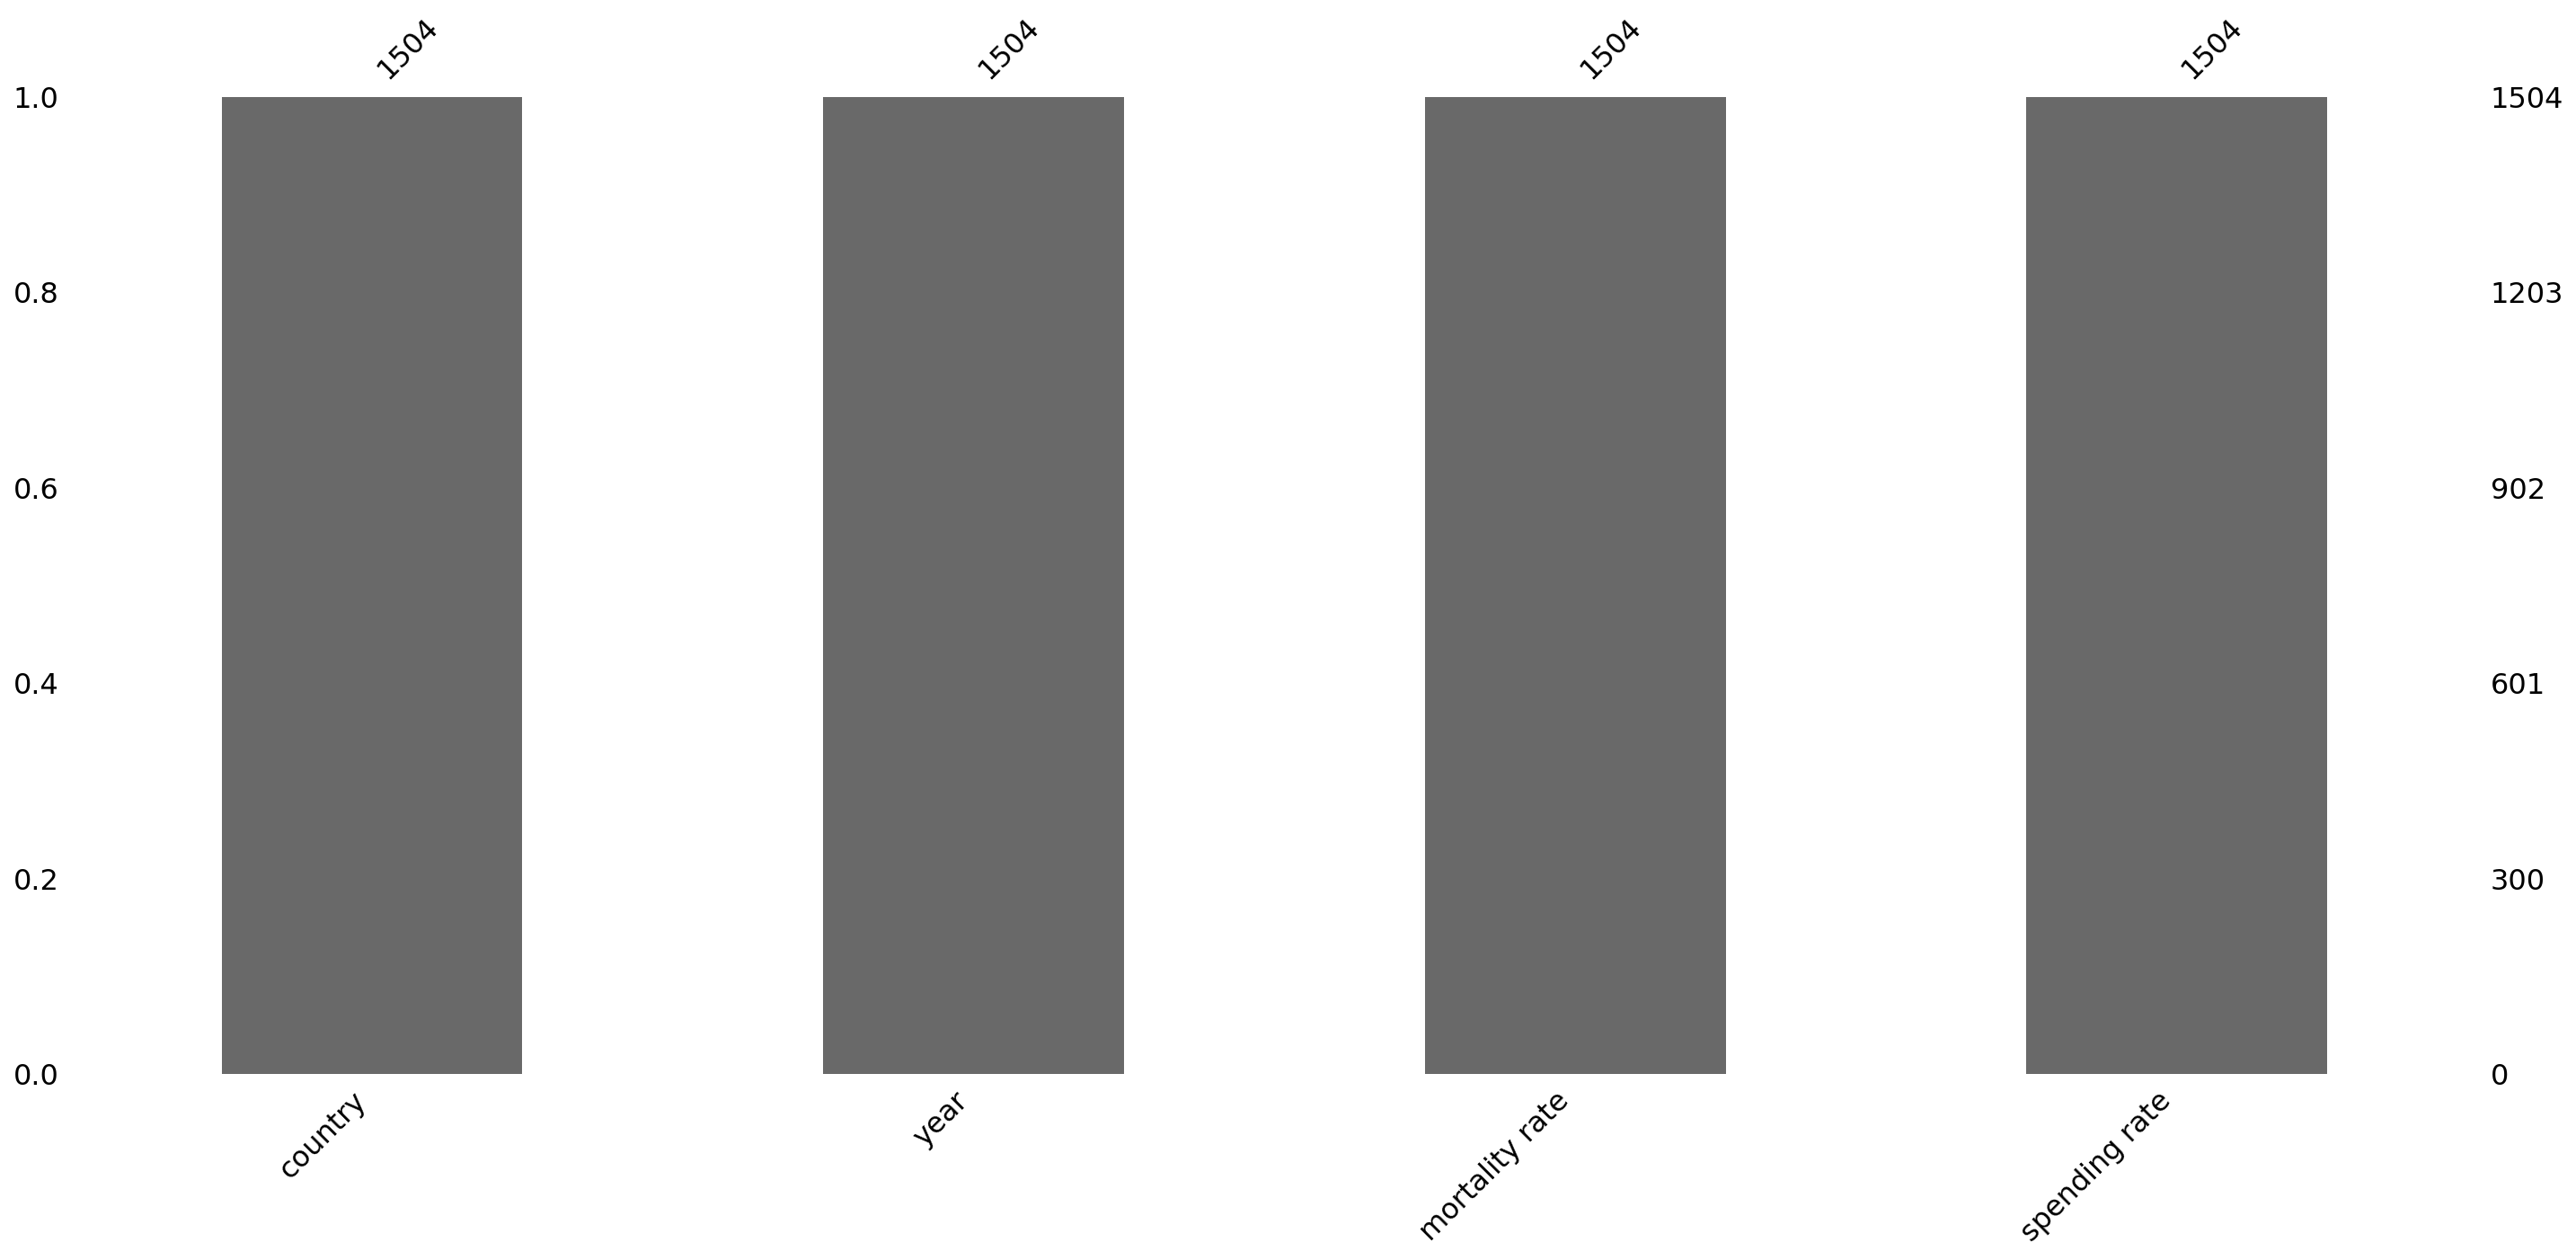

In [55]:
ms.bar(df_spending)

Our spending dataframe is now clean and ready for analysis. Though, next we will work on the other dataframe and get it to the point of being clean enough for analysis.

## Wrangling the main dataframe without the spending values

In [56]:
df_all.isnull().sum()

country               0
year                  0
mortality rate        0
income per person    78
population            0
dtype: int64

Here we can see that we have some incomplete rows within the income per person and population totals columns. We will take a look at the shape of the dataframe and work from there.



In [57]:
df_all.shape

(7683, 5)

There are 7486 rows in the df_all dataframe, so identifying and removing the 76 incomplete rows will not be a large impact on the dataset. Next we will work on indentifying what is missing so we can remove.

In [58]:
is_nan2 = df_all[df_all.isnull().any(axis=1)]
print(is_nan2)

            country  year  mortality rate income per person population
2847       Holy See  1980           76.70               NaN        723
2848       Holy See  1981           74.30               NaN        725
2849       Holy See  1982           71.80               NaN        730
2850       Holy See  1983           69.40               NaN        733
2851       Holy See  1984           67.00               NaN        740
...             ...   ...             ...               ...        ...
3895  Liechtenstein  2014            6.54               NaN      37.5k
3896  Liechtenstein  2015            6.45               NaN      37.7k
3897  Liechtenstein  2016            6.33               NaN      37.8k
3898  Liechtenstein  2017            6.19               NaN      37.9k
3899  Liechtenstein  2018            6.03               NaN        38k

[78 rows x 5 columns]


### Utilizing the Missingo package to visualize where the missing data is

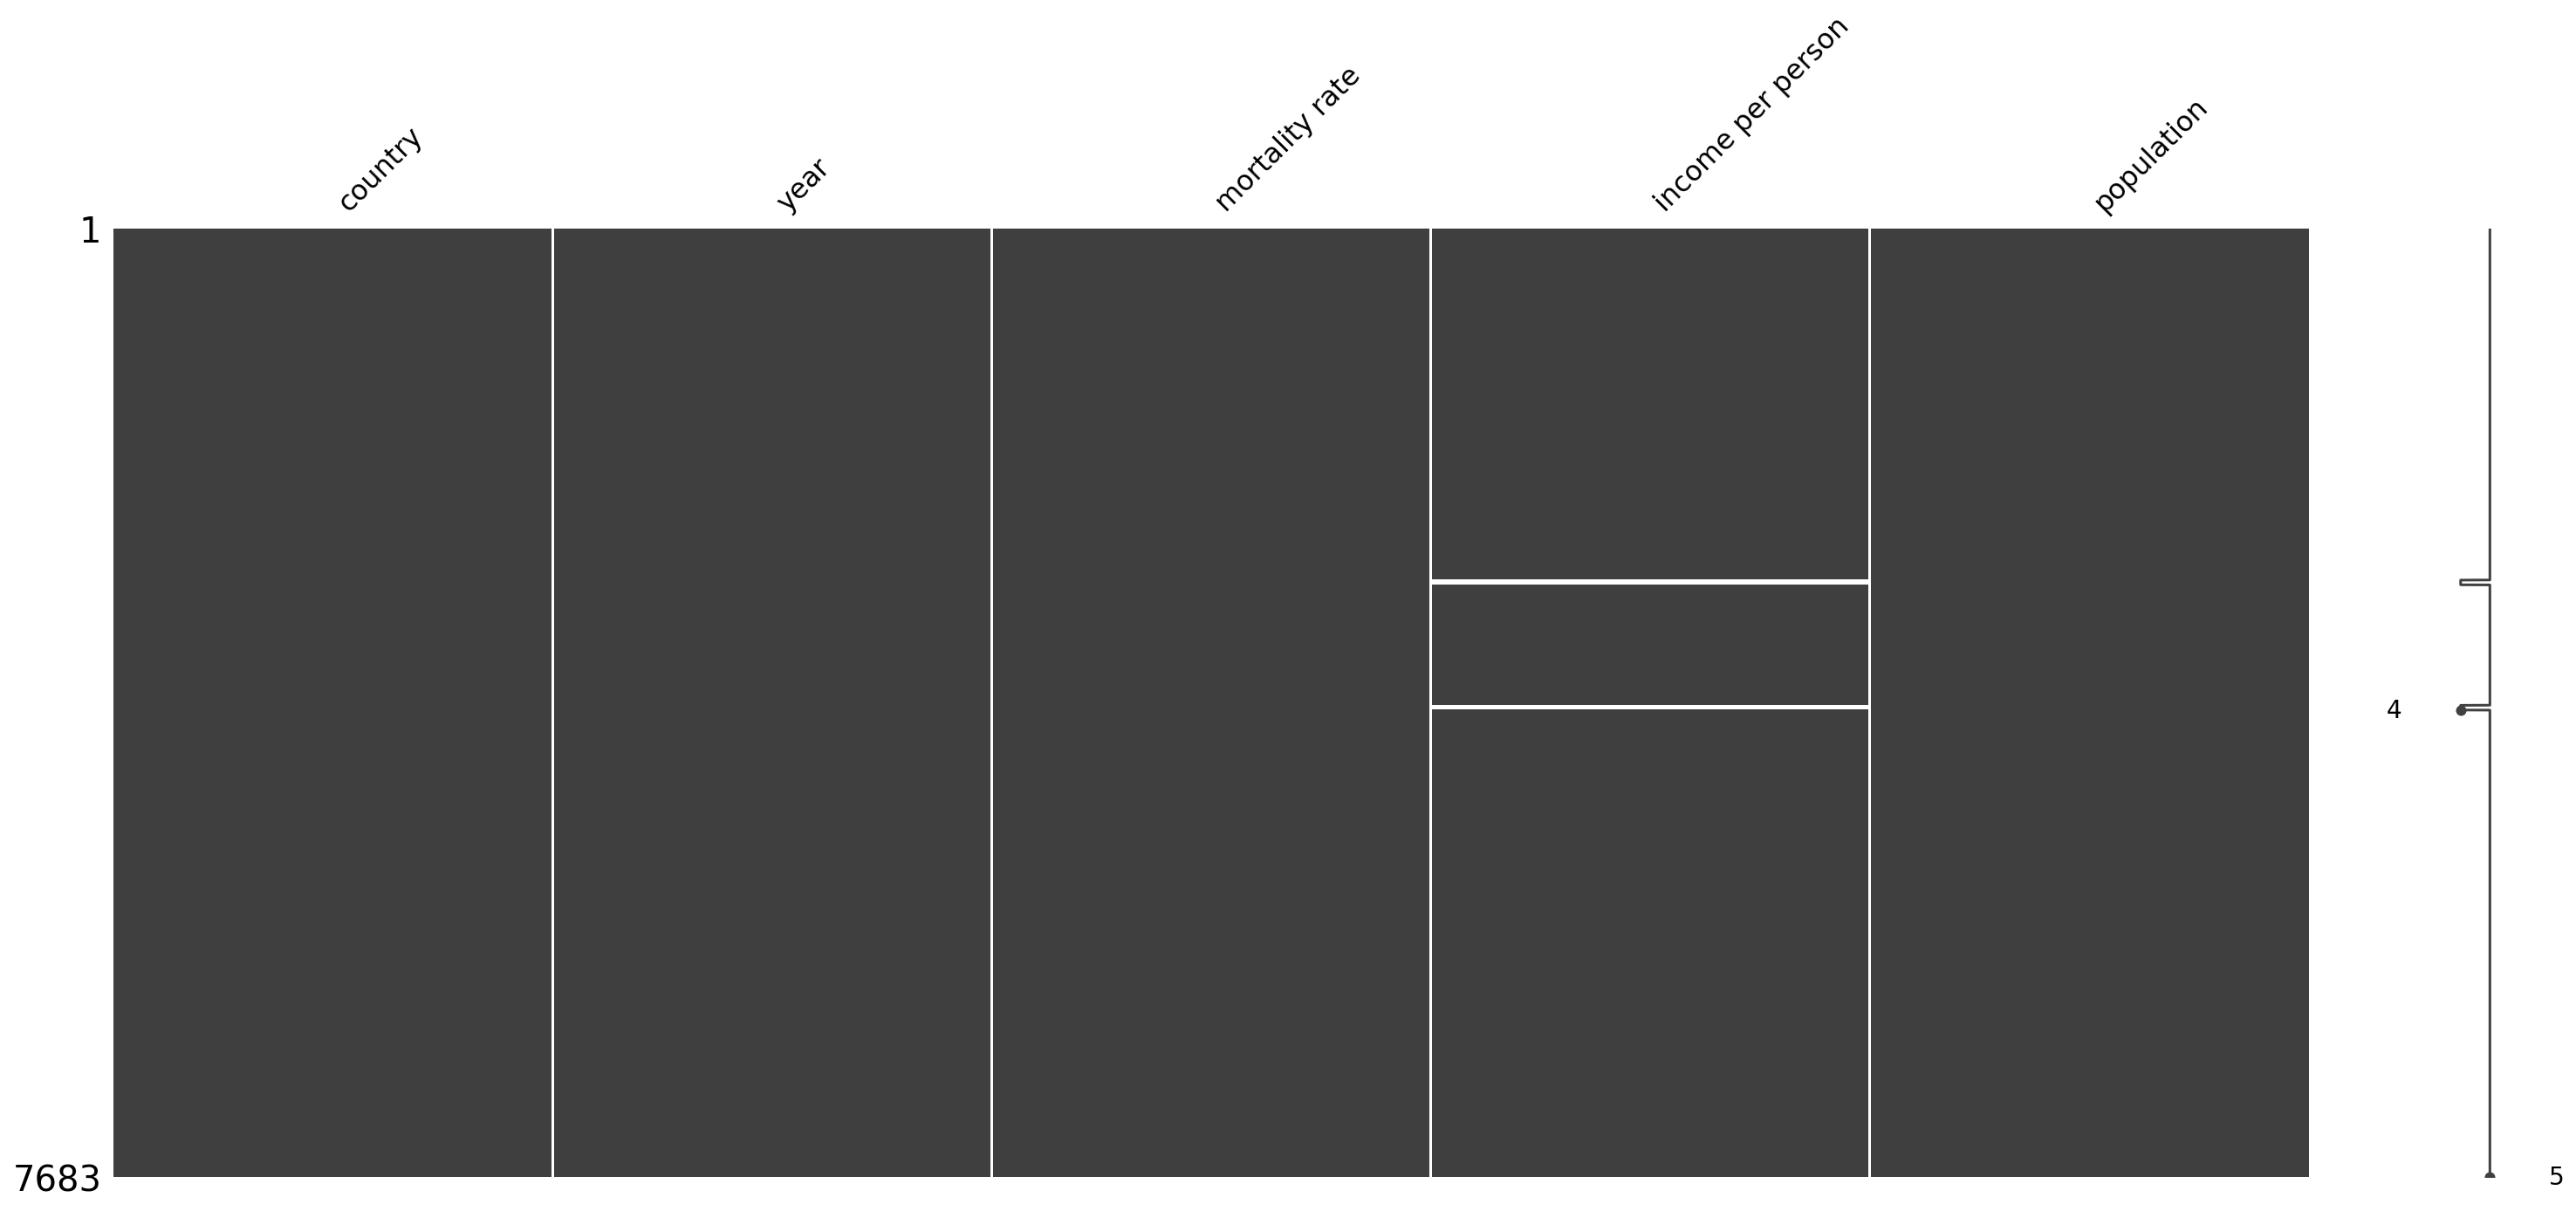

In [59]:
ms.matrix(df_all);

We are still missing data in the income per person column, so we will run a function the same function we created earlier to identify the missing values.

In [60]:
#run the missing values function
show_num_missing(df_all, 'income per person')

Holy See - 39
Liechtenstein - 39


['Holy See', 'Liechtenstein']

We've run the function to find the missing values, which we can see are from the countries 'Holy See' and 'Liechenstein'. Now we will drop them from the dataframe.

In [62]:
#drop all the countries with missing values
missing_values = show_num_missing(df_all, 'income per person');
df_all = df_all.drop(df_all[df_all["country"].isin(missing_values)].index)

Holy See - 39
Liechtenstein - 39


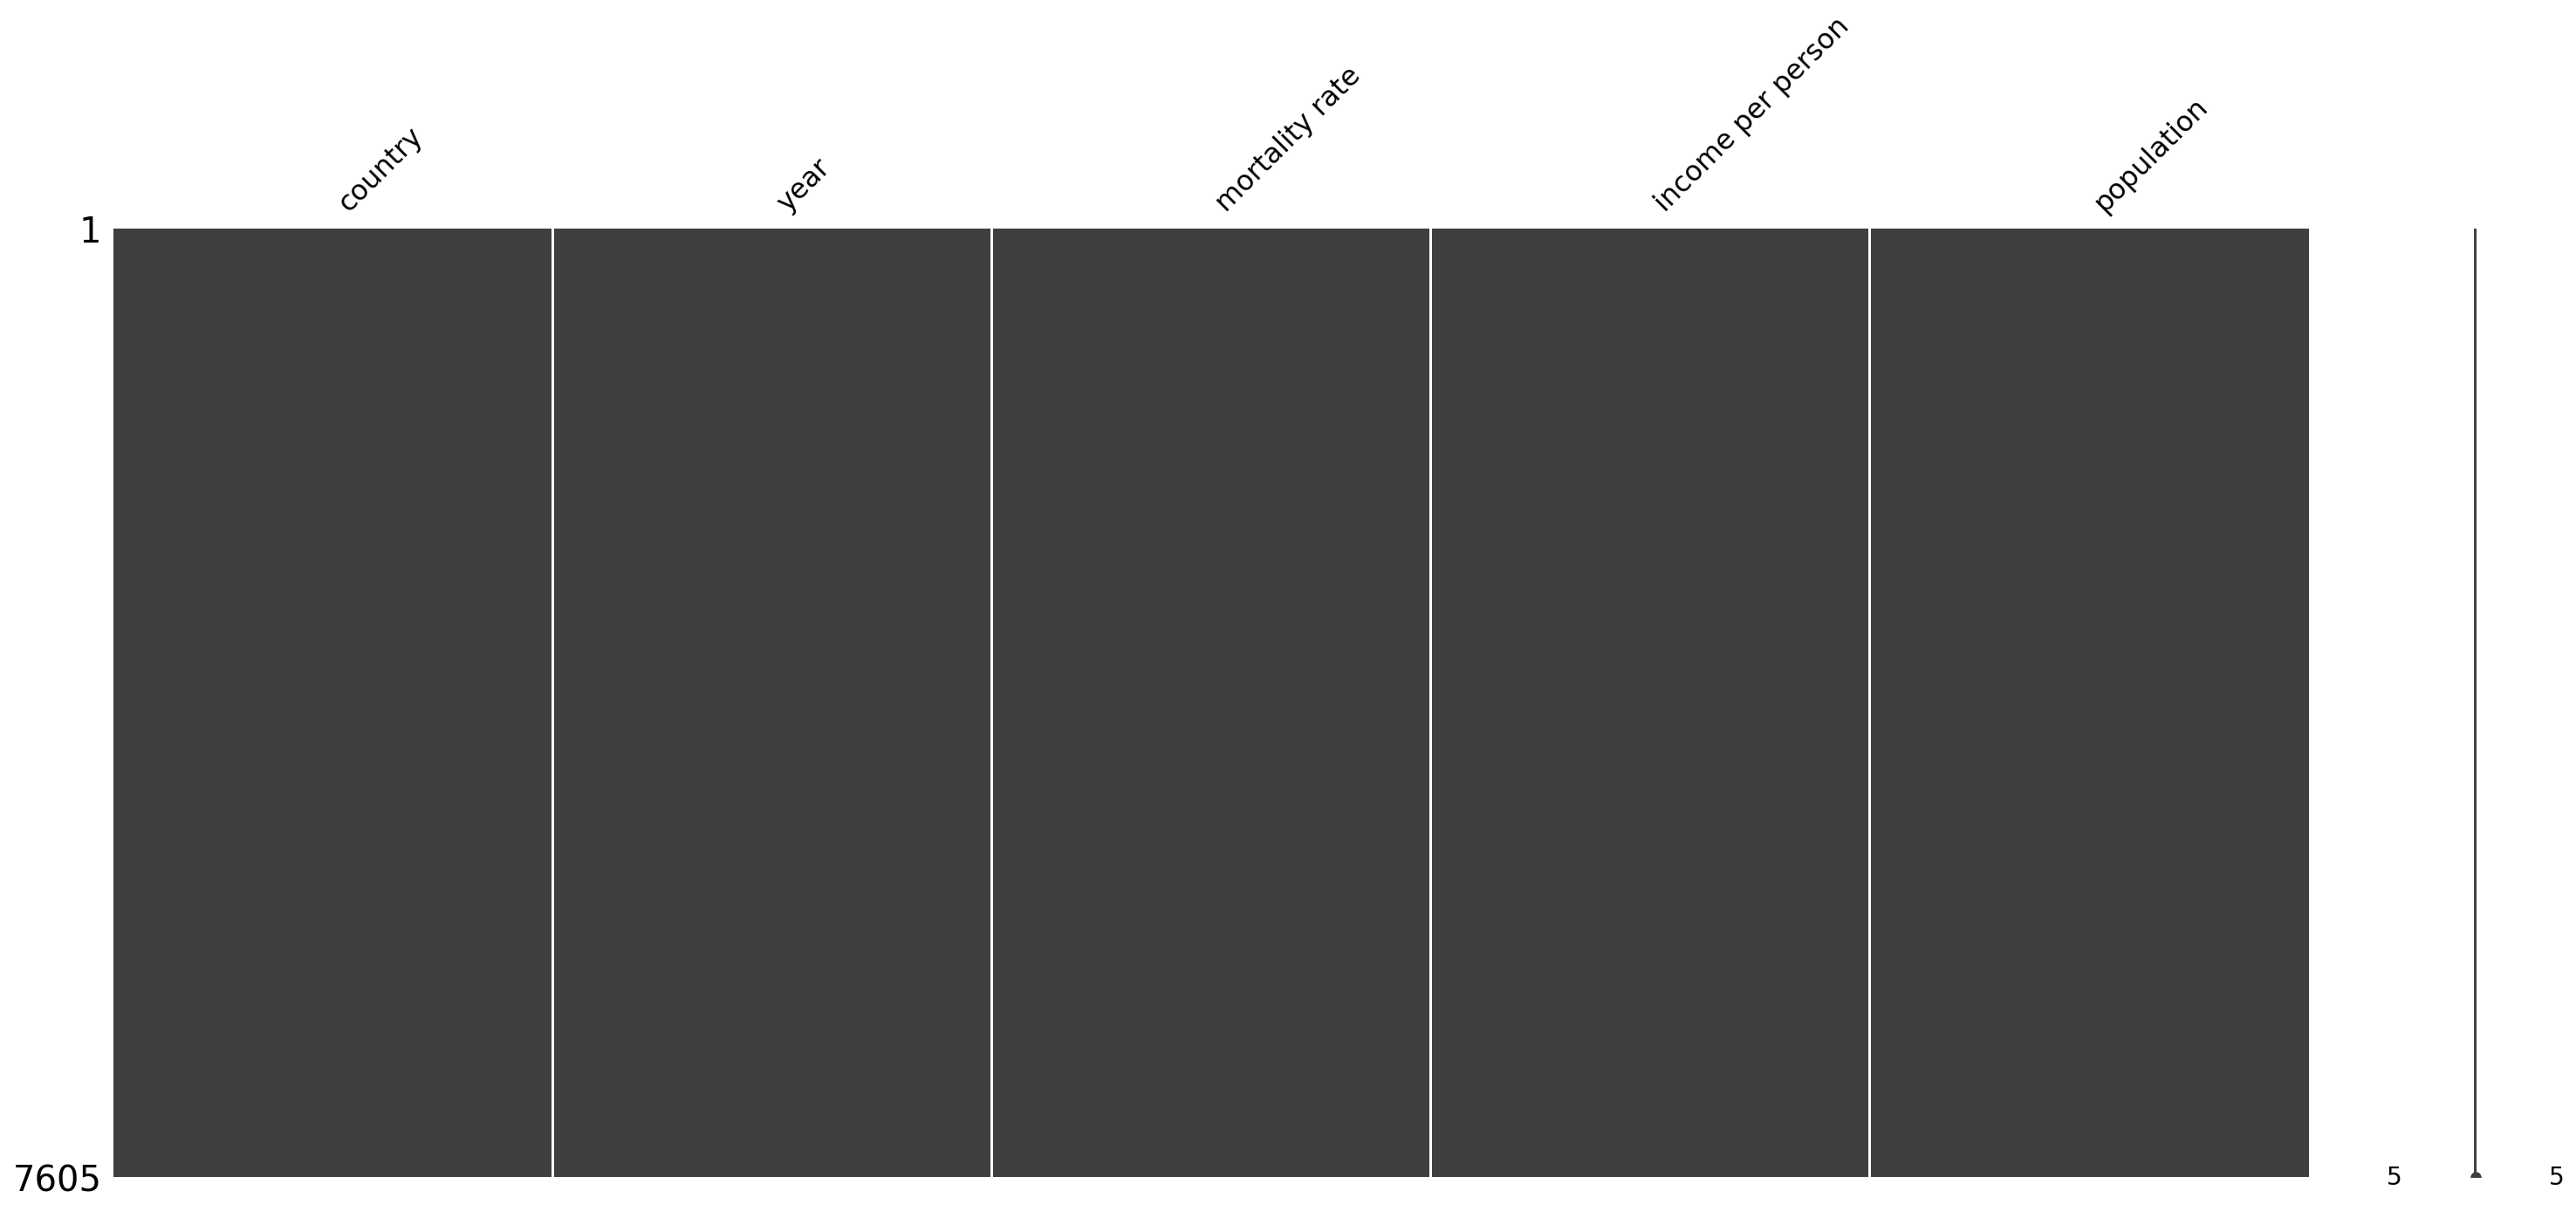

In [63]:
ms.matrix(df_all);

Now the dataframe is organized and clean, with no missing values. Next we will check the dataframe to see what our datatypes are.

In [64]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 0 to 7682
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            7605 non-null   object 
 1   year               7605 non-null   int64  
 2   mortality rate     7605 non-null   float64
 3   income per person  7605 non-null   object 
 4   population         7605 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 356.5+ KB


From the dataframe info we can see that the "income per person" and "population" column is an object type. In order to analyze these values we need to convert them to int.

## Casting error

We have run into an issue with the income per person containing strings in the values. I ran the following code which produced the error: *"invalid literal for int() with base 10: '10.2k'"*. 

This is indicating there are values with string characters. 

Code ran:

**df_all['income per person'].astype(int)**

We will need to create a function to clean these values and convert them to their numerical value.

Next I will create a function to go through the values in the income per person column and look for values that end with k for thousands, M for millions and B for billions. Once the string character has been stripped the number will then be multiplied by its implied character value to give us the end result.

https://stackoverflow.com/questions/39433738/changing-strings-into-integers

In [65]:
def convert(value):
   
    if value:
        # determine multiplier
        multiplier = 1
        if value.endswith('k'):
            multiplier = 1000
            value = value[0:len(value)-1] # strip multiplier character
        elif value.endswith('M'):
            multiplier = 1000000
            value = value[0:len(value)-1] # strip multiplier character
        elif value.endswith('B'):
            multiplier = 1000000
            value = value[0:len(value)-1] # strip multiplier character

        # convert value to float, multiply, then convert the result to int
        return int(float(value) * multiplier)

    else:
        return value #returns the original value if the value did not contain a string character

values = df_all['income per person']

# use a list comprehension to call the function on all values
numbers = [convert(value) for value in values]



In [66]:
def convert(value):
   
    if value:
        # determine multiplier
        multiplier = 1
        if value.endswith('k'):
            multiplier = 1000
            value = value[0:len(value)-1] # strip multiplier character
        elif value.endswith('M'):
            multiplier = 1000000
            value = value[0:len(value)-1] # strip multiplier character
        elif value.endswith('B'):
            multiplier = 1000000
            value = value[0:len(value)-1] # strip multiplier character

        # convert value to float, multiply, then convert the result to int
        return int(float(value) * multiplier)

    else:
        return value #returns the original value if the value did not contain a string character

values = df_all['population']

# use a list comprehension to call the function on all values
numbers = [convert(value) for value in values]

In [67]:
#apply the function to the column to convert the numbers
df_all['income per person'] = df_all['income per person'].apply(convert)
df_all['population'] = df_all['population'].apply(convert)

In [68]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 0 to 7682
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            7605 non-null   object 
 1   year               7605 non-null   int64  
 2   mortality rate     7605 non-null   float64
 3   income per person  7605 non-null   int64  
 4   population         7605 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 356.5+ KB


Now the "income per person" column is an int as we needed. Our dataframe is ready for analysis and we will begin to answer our questions.


# Question 1: How did child mortality rates change over time?

Next I will plot a chart showing the child mortality rate through the years.

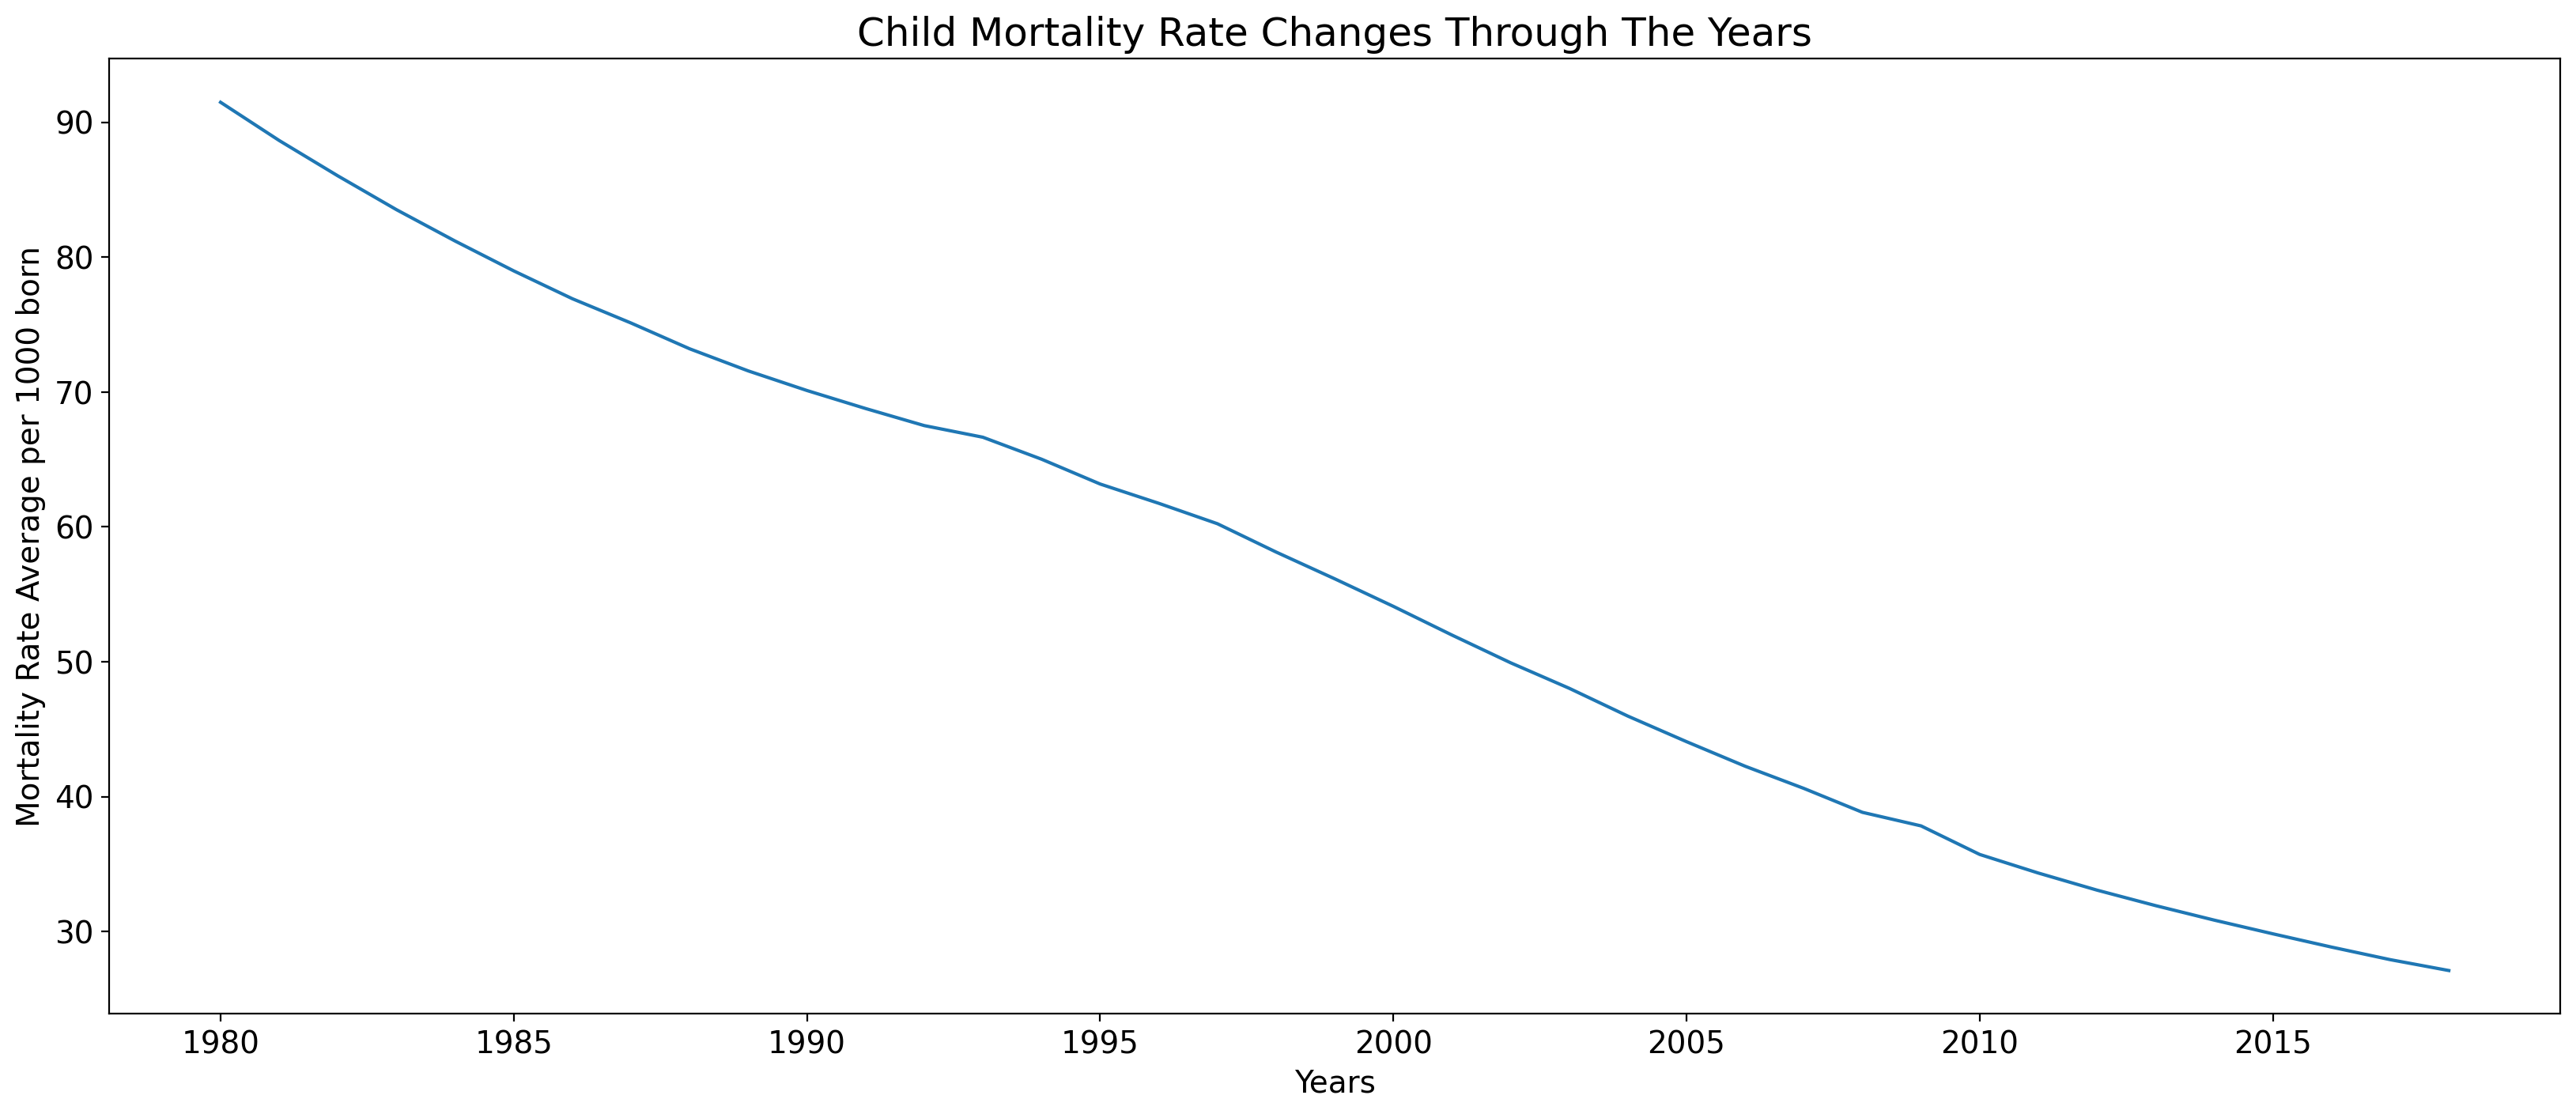

In [69]:
#group data by year and mortality rate and get the mean
yearly_mortality = df_all.groupby('year')['mortality rate'].mean()

#figure size(width, height)
plt.figure(figsize=(20,8), dpi = 100)

#on x-axis
plt.xlabel('Years', fontsize = 14)
plt.xticks(fontsize=14)
#on y-axis
plt.ylabel('Mortality Rate Average per 1000 born', fontsize = 14)
plt.yticks(fontsize=14)
#title of the line plot
plt.title('Child Mortality Rate Changes Through The Years', fontsize=18)

#plotting the graph
plt.plot(yearly_mortality)

#displaying the line plot
plt.show()

In [70]:
#run the Pandas pct_change to observe the percentage of change from one year to the next
yearly_mortality.pct_change()

year
1980         NaN
1981   -0.030989
1982   -0.029567
1983   -0.029153
1984   -0.027845
1985   -0.027251
1986   -0.026139
1987   -0.023410
1988   -0.025456
1989   -0.022403
1990   -0.020282
1991   -0.019044
1992   -0.018401
1993   -0.012796
1994   -0.024412
1995   -0.028324
1996   -0.022639
1997   -0.024516
1998   -0.034830
1999   -0.034144
2000   -0.036368
2001   -0.039351
2002   -0.039544
2003   -0.037901
2004   -0.042934
2005   -0.041208
2006   -0.041330
2007   -0.038878
2008   -0.043717
2009   -0.025901
2010   -0.055945
2011   -0.038604
2012   -0.036881
2013   -0.034757
2014   -0.033702
2015   -0.032901
2016   -0.032978
2017   -0.032279
2018   -0.028895
Name: mortality rate, dtype: float64


## Question 1 Summary Observations 

From the plot above we can see the child mortality rate has steadily decreased from 1980 - 2018. From the shape of this plot we can see a clear decline in child mortality rates over the years. Next we will see what countries have the highest child mortality rate.

# Question 2: Which countries have the highest child mortality rate?

Next we will analyze dataframe to see which countries have the highest child mortality rate.

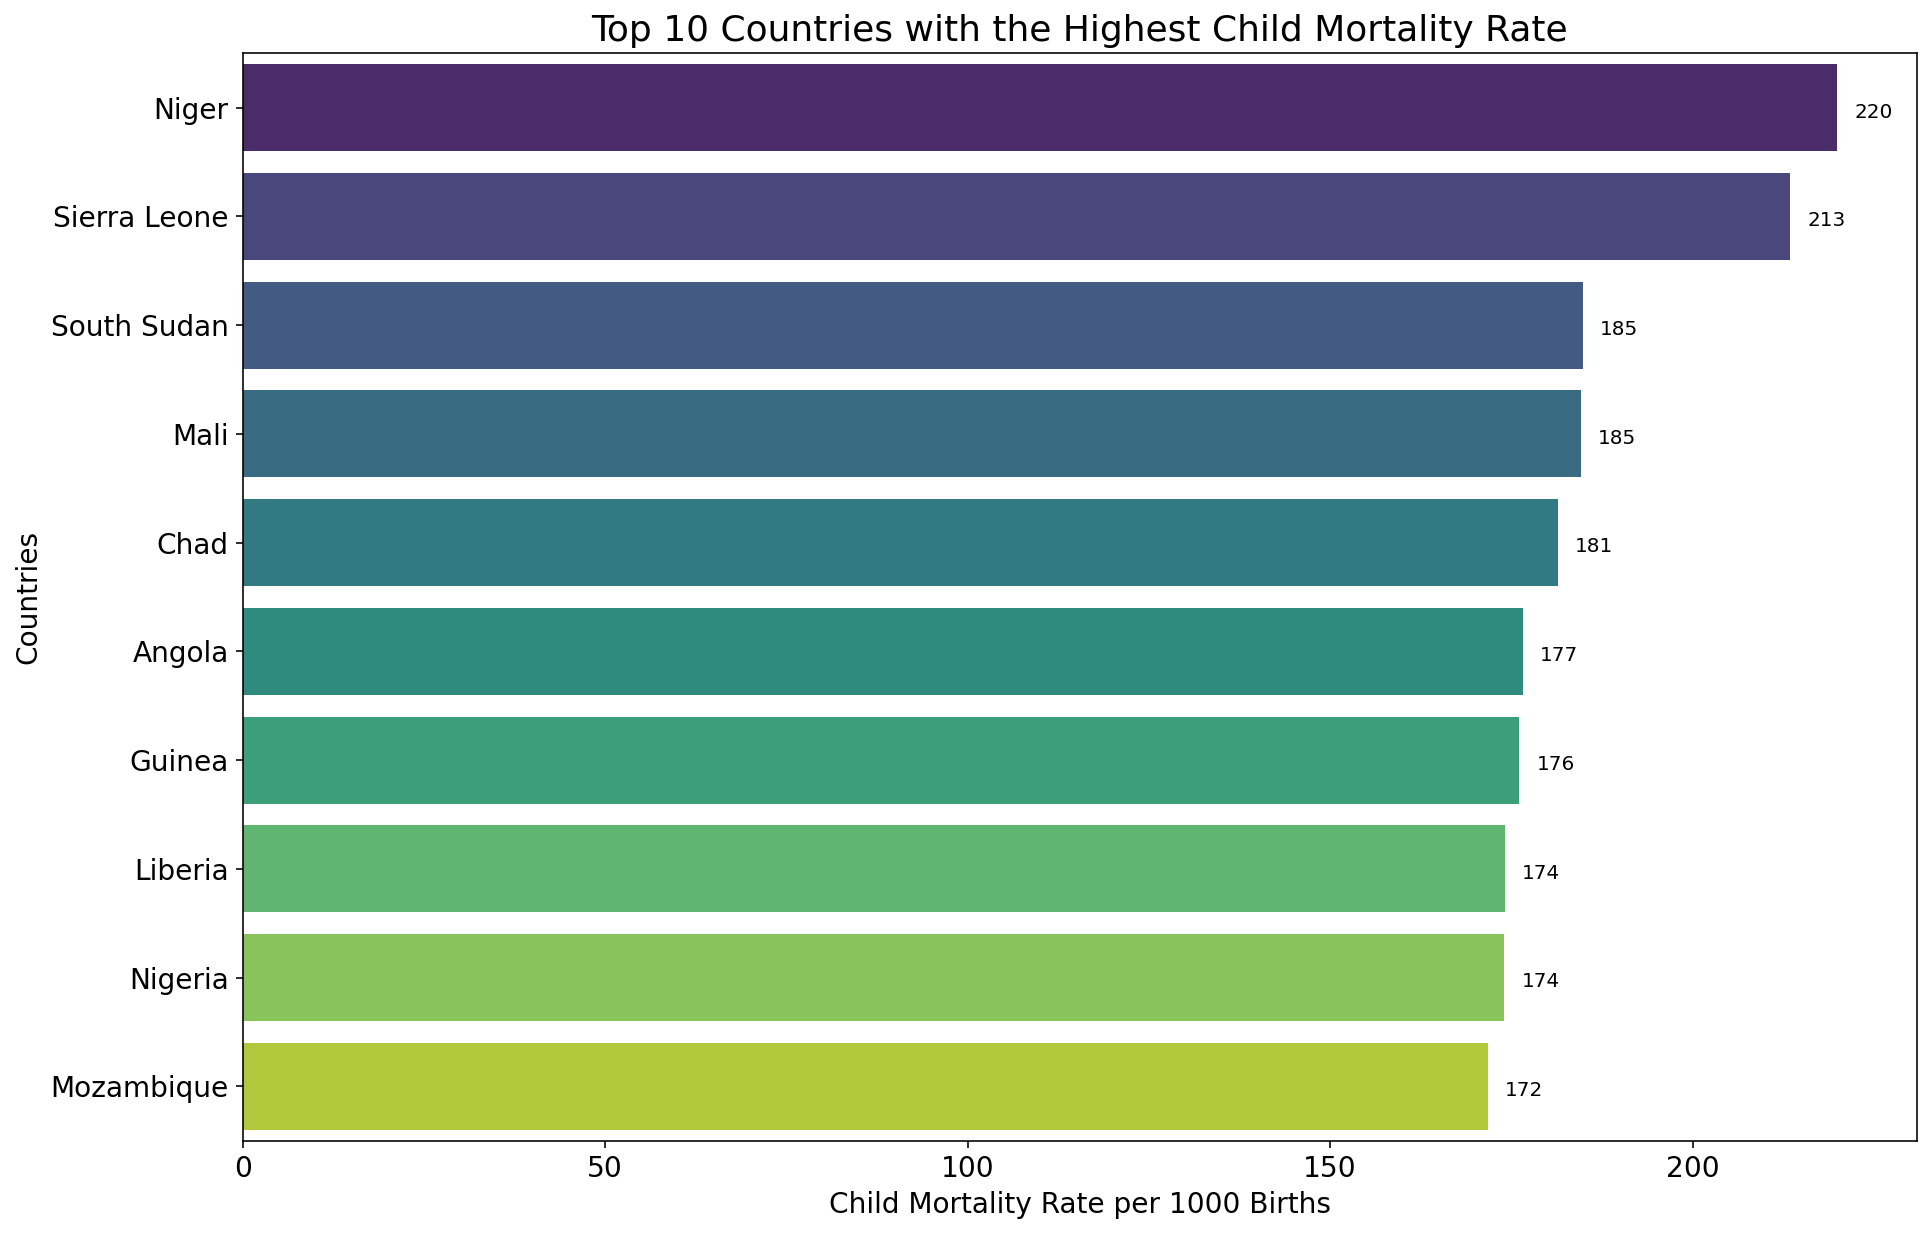

In [71]:
#plotting using seaborn
max_mean = df_all.groupby('country', as_index=False)['mortality rate'].mean()
country_count  = max_mean.nlargest(10, 'mortality rate')
sns.set_palette("viridis", 10)

x = country_count['mortality rate']
y = country_count['country']

plt.figure(figsize=(15,10))

ax = sns.barplot(x=x, y=y, alpha=None, orient='h')
#create number annotations for bar plot (https://stackoverflow.com/questions/42861049/horizontal-barplot-with-annotations/42865017)
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
#labels
plt.title('Top 10 Countries with the Highest Child Mortality Rate', fontsize=18)
plt.ylabel('Countries', fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Child Mortality Rate per 1000 Births', fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [72]:
max_mean.nlargest(10, 'mortality rate')

,country,mortality rate
124,Niger,219.897436
151,Sierra Leone,213.487179
159,South Sudan,184.812821
104,Mali,184.610256
33,Chad,181.384615
4,Angola,176.602564
69,Guinea,176.110256
96,Liberia,174.135897
125,Nigeria,174.025641
116,Mozambique,171.730769


## Question 2 Summary Observations

The plot above shows us the top 10 countries with the highest child mortality rates. From this plot we can see that most of the countries in this list are in Africa. Our next analysis will help to determine what factors may contribute to these child mortality rates.

# Question 3: Does government spending on healthcare have an effect on child mortality rates?

We will use our spending dataframe to analyze the percentage of healthcare spending that governments contribute for each country against the child mortality rates.

In [73]:
#checking the dataframe to verify the columns
df_spending.head()

,country,year,mortality rate,spending rate
21,Afghanistan,2001,121.0,5.62
22,Afghanistan,2002,117.0,6.83
23,Afghanistan,2003,113.0,7.81
24,Afghanistan,2004,109.0,11.60
25,Afghanistan,2005,104.0,11.80


I see that the dataframe looks correct so next I will proceed to group the data by country, mortality rate and spending rate. We won't need the years for this analysis.

In [74]:
#grouping data into new dataframe by country with the mean applied to the other columns
spending_corr = df_spending.groupby(['country'], as_index=False)[['mortality rate', 'spending rate']].mean()

In [75]:
spending_corr.info

<bound method DataFrame.info of          country  mortality rate  spending rate
0    Afghanistan        106.4875         9.9075
1        Albania         18.6250        38.7875
2        Algeria         32.9000        76.2125
3        Andorra          5.1625        69.4875
4         Angola        161.6250        80.5125
..           ...             ...            ...
183      Vanuatu         28.6625        80.2125
184    Venezuela         18.3875        41.9125
185      Vietnam         25.0875        32.6000
186        Yemen         70.9875        35.9750
187       Zambia        109.1125        59.0250

[188 rows x 3 columns]>

Now the dataframe is grouped correctly and we can see each country has its mean child mortality rate.

Next I will create a function to create a continent columns for the dataframe so we can plot the data with better visibility.

In [76]:
def def_continent(column):

    try:
        continent = pycountry_convert.convert_country_alpha2_to_continent_code.COUNTRY_ALPHA2_TO_CONTINENT_CODE[
        pycountry.countries.lookup(column).alpha_2]
    except: 
        continent = "Error"
        
    return continent

In [77]:
#apply the function to the spending country column to create the continents
spending_corr['continent'] = spending_corr['country'].apply(def_continent)

In [78]:
spending_corr.head()

,country,mortality rate,spending rate,continent
0,Afghanistan,106.4875,9.9075,AS
1,Albania,18.6250,38.7875,EU
2,Algeria,32.9000,76.2125,AF
3,Andorra,5.1625,69.4875,EU
4,Angola,161.6250,80.5125,AF


We can see that the dataframe shows the new column with the continent for the respective country. Next we will check for errors.

In [79]:
#show missing countries
spending_corr[spending_corr.continent == "Error"]

,country,mortality rate,spending rate,continent
24,Brunei,9.54625,84.2125,Error
31,Cape Verde,26.70000,75.6250,Error
38,"Congo, Dem. Rep.",135.62500,29.7450,Error
39,"Congo, Rep.",84.02500,54.0500,Error
41,Cote d'Ivoire,124.87500,23.3875,Error
78,Iran,25.35000,44.4875,Error
109,"Micronesia, Fed. Sts.",46.01250,93.0000,Error
139,Russia,13.53750,61.8125,Error
154,South Korea,5.41250,54.6125,Error
157,St. Kitts and Nevis,17.46250,53.8125,Error


We only have a small number of countries that produced an error and did not create a continent. Next we will create a mapping for these countries and apply it to the column.

In [80]:
#create map for the missing countries
error_map = {
    "Brunei": "AS",
    "Cape Verde": "AF",
    "Congo, Dem. Rep.": "AF",
    "Congo, Rep.": "AF",
    "Cote d'Ivoire": "AF",
    "Iran": "AS",
    "Macedonia, FYR": "EU",
    "Micronesia, Fed. Sts.": "OC",
    "North Korea": "AS",
    "Palestine": "AS",
    "Russia": "AS",
    "South Korea": "AS",
    "St. Lucia": "NA",
    "St. Vincent and the Grenadines": "NA",
    "Syria": "AS",
    "St. Kitts and Nevis": "NA",
    "Timor-Leste": "AS"}

In [81]:
#add the missing countries
for x in list(error_map.keys()):
    print(x)
    spending_corr.loc[spending_corr[spending_corr.country == x].index, "continent"] = error_map[x]

Brunei
Cape Verde
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Iran
Macedonia, FYR
Micronesia, Fed. Sts.
North Korea
Palestine
Russia
South Korea
St. Lucia
St. Vincent and the Grenadines
Syria
St. Kitts and Nevis
Timor-Leste


In [82]:
spending_corr['continent'].unique()

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

There are now no more errors and all countires have an identified continent. 

We are are ready to create the plot. Now that we have our unique continents list we will create a color map for the scatter plot and plot the data.

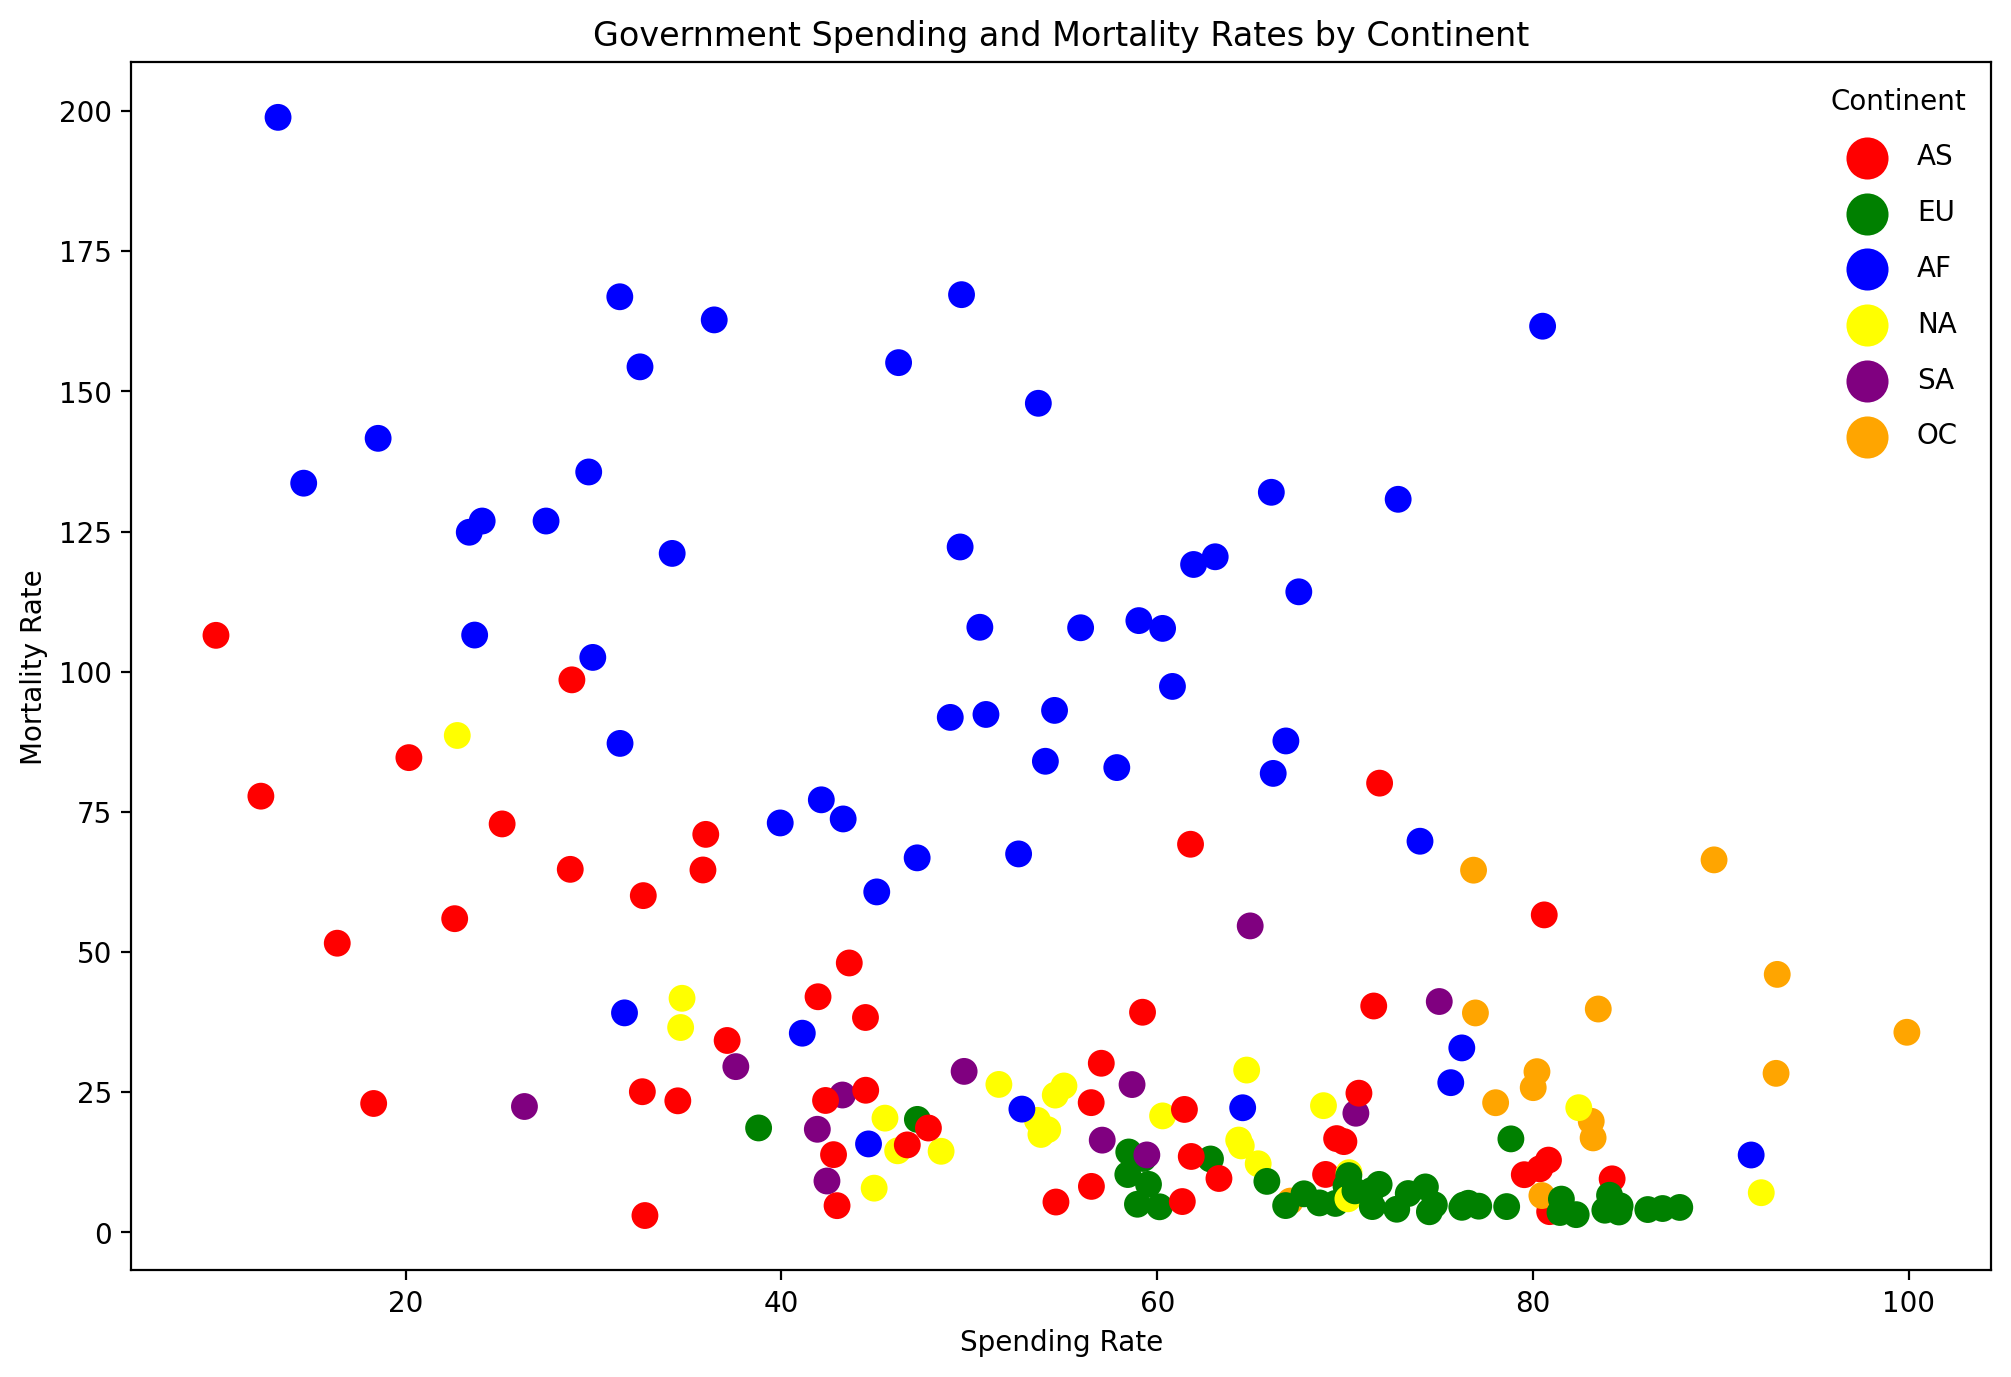

In [83]:
#Create the color map for continents
colors = {'AS':'red', 'EU':'green', 'AF':'blue', 'NA':'yellow', 'SA': 'purple', 'OC': 'orange'}
#Set the scatter plot size
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})

fig, ax = plt.subplots()
scatter = ax.scatter(x=spending_corr['spending rate'],y=spending_corr['mortality rate'], s=75, c=spending_corr['continent'].map(colors), label = None)

# set title and axis labels
plt.title('Government Spending and Mortality Rates by Continent')
ax.set_xlabel('Spending Rate')
ax.set_ylabel('Mortality Rate')

# produce a legend with the unique colors from the scatter
for continent in list(spending_corr.continent.unique()):
    plt.scatter([], [], c=colors[continent], alpha=1, label=str(continent), s = 200)
    
legend1 = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Continent')

plt.show()

From out plot we can see there is a trend towards a negative linear correlation. We will run a few formulas to drill down and see how related these variables are.

In [84]:
r = np.corrcoef(spending_corr['spending rate'], spending_corr['mortality rate'])
print(r)

[[ 1.         -0.47005328]
 [-0.47005328  1.        ]]


## Observations
Above we have run the correlation coeffient for the spending rate vs mortality rate which gave us an overall **r of -0.47.** This indicates a weak to moderate negative correlation between how much a government spends towards healthcare and child mortality rates as a whole.

Though, as we can see from the scatter plot, most of the continents are trending in groups indicating that each continent may have stronger relationships than others. We will dig a bit deeper to investigate this.

In [85]:
spending_corr.groupby('continent')[['spending rate','mortality rate']].corr()

spending rate  mortality rate
continent                                              
AF        spending rate        1.000000       -0.384056
          mortality rate      -0.384056        1.000000
AS        spending rate        1.000000       -0.541627
          mortality rate      -0.541627        1.000000
EU        spending rate        1.000000       -0.697386
          mortality rate      -0.697386        1.000000
NA        spending rate        1.000000       -0.642711
          mortality rate      -0.642711        1.000000
OC        spending rate        1.000000        0.353164
          mortality rate       0.353164        1.000000
SA        spending rate        1.000000        0.395725
          mortality rate       0.395725        1.000000

## Question 3 Summary Observations

Now that we have analyzed a little deeper we can see that there are some relationships here between government spending on health care and child mortality rates. By grouping the continents and running the correlation coeffient we can get a better idea of what is going on in the scatter plot.

EU and NA have a moderate to strong negative correlation coefficient, indicating that the more a government spends per person leads to less child deaths. AS and AF come behind these with weak negative correlations.

Though, OC and SA show weak positive correlations, which indicate there are other cofounding variables that contribute to the child mortality rate in those continents. For the majority of the world, this analysis shows there is a moderate relationship between goverment health spending percentage and child mortality rate. For Oceania and South America, perhaps our next analysis will shed more light on their child mortality rates.

# Question 4: Is there a relationship between income and child mortality?

We will apply some of the same steps from our previous plot to create this analysis.

In [86]:
#checking the dataframe for datatypes
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7605 entries, 0 to 7682
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            7605 non-null   object 
 1   year               7605 non-null   int64  
 2   mortality rate     7605 non-null   float64
 3   income per person  7605 non-null   int64  
 4   population         7605 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 356.5+ KB


Now we will group the data by the country and get the mean for the mortality rate and income per person columns.

In [87]:
#grouping data for plotting
income_corr = df_all.groupby(('country'), as_index=False)[['mortality rate', 'income per person']].mean()

We will apply the same function used previously to create the continents for this dataframe.

In [88]:
income_corr['continent'] = income_corr['country'].apply(def_continent)

In [89]:
#checking our that our continent column is present
income_corr.head()

,country,mortality rate,income per person,continent
0,Afghanistan,135.461538,1562.205128,AS
1,Albania,29.433077,6751.538462,EU
2,Algeria,45.679487,11596.666667,AF
3,Andorra,7.687436,35264.102564,EU
4,Angola,176.602564,4919.743590,AF


In [90]:
#show missing countries
income_corr[income_corr.continent == "Error"]

,country,mortality rate,income per person,continent
24,Brunei,11.849231,86174.358974,Error
31,Cape Verde,44.410256,3818.974359,Error
38,"Congo, Dem. Rep.",152.276923,936.769231,Error
39,"Congo, Rep.",85.682051,5197.692308,Error
41,Cote d'Ivoire,132.107692,3297.948718,Error
74,"Hong Kong, China",5.271282,36666.641026,Error
79,Iran,40.482051,14515.384615,Error
110,"Micronesia, Fed. Sts.",48.484615,2982.051282,Error
126,North Korea,40.846154,1935.897436,Error
132,Palestine,35.625641,3419.487179,Error


In [91]:
#create map for the missing countries
error_map = {
    "Brunei": "AS",
    "Cape Verde": "AF",
    "Congo, Dem. Rep.": "AF",
    "Congo, Rep.": "AF",
    "Cote d'Ivoire": "AF",
    "Iran": "AS",
    "Hong Kong, China": "AS",
    "Macedonia, FYR": "EU",
    "Micronesia, Fed. Sts.": "OC",
    "North Korea": "AS",
    "Palestine": "AS",
    "Russia": "AS",
    "South Korea": "AS",
    "St. Lucia": "NA",
    "St. Vincent and the Grenadines": "NA",
    "Syria": "AS",
    "St. Kitts and Nevis": "NA",
    "Timor-Leste": "AS"}

In [92]:
#add the missing countries manually
for x in list(error_map.keys()):
        print(x)
        income_corr.loc[income_corr[income_corr.country == x].index, "continent"] = error_map[x]

Brunei
Cape Verde
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Iran
Hong Kong, China
Macedonia, FYR
Micronesia, Fed. Sts.
North Korea
Palestine
Russia
South Korea
St. Lucia
St. Vincent and the Grenadines
Syria
St. Kitts and Nevis
Timor-Leste


In [93]:
income_corr['continent'].unique()

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

Now that we have completed the above steps to the get the continents created for the countires in this dataframe we are ready to plot. We will use the same colors to indicate the continents in this plot.

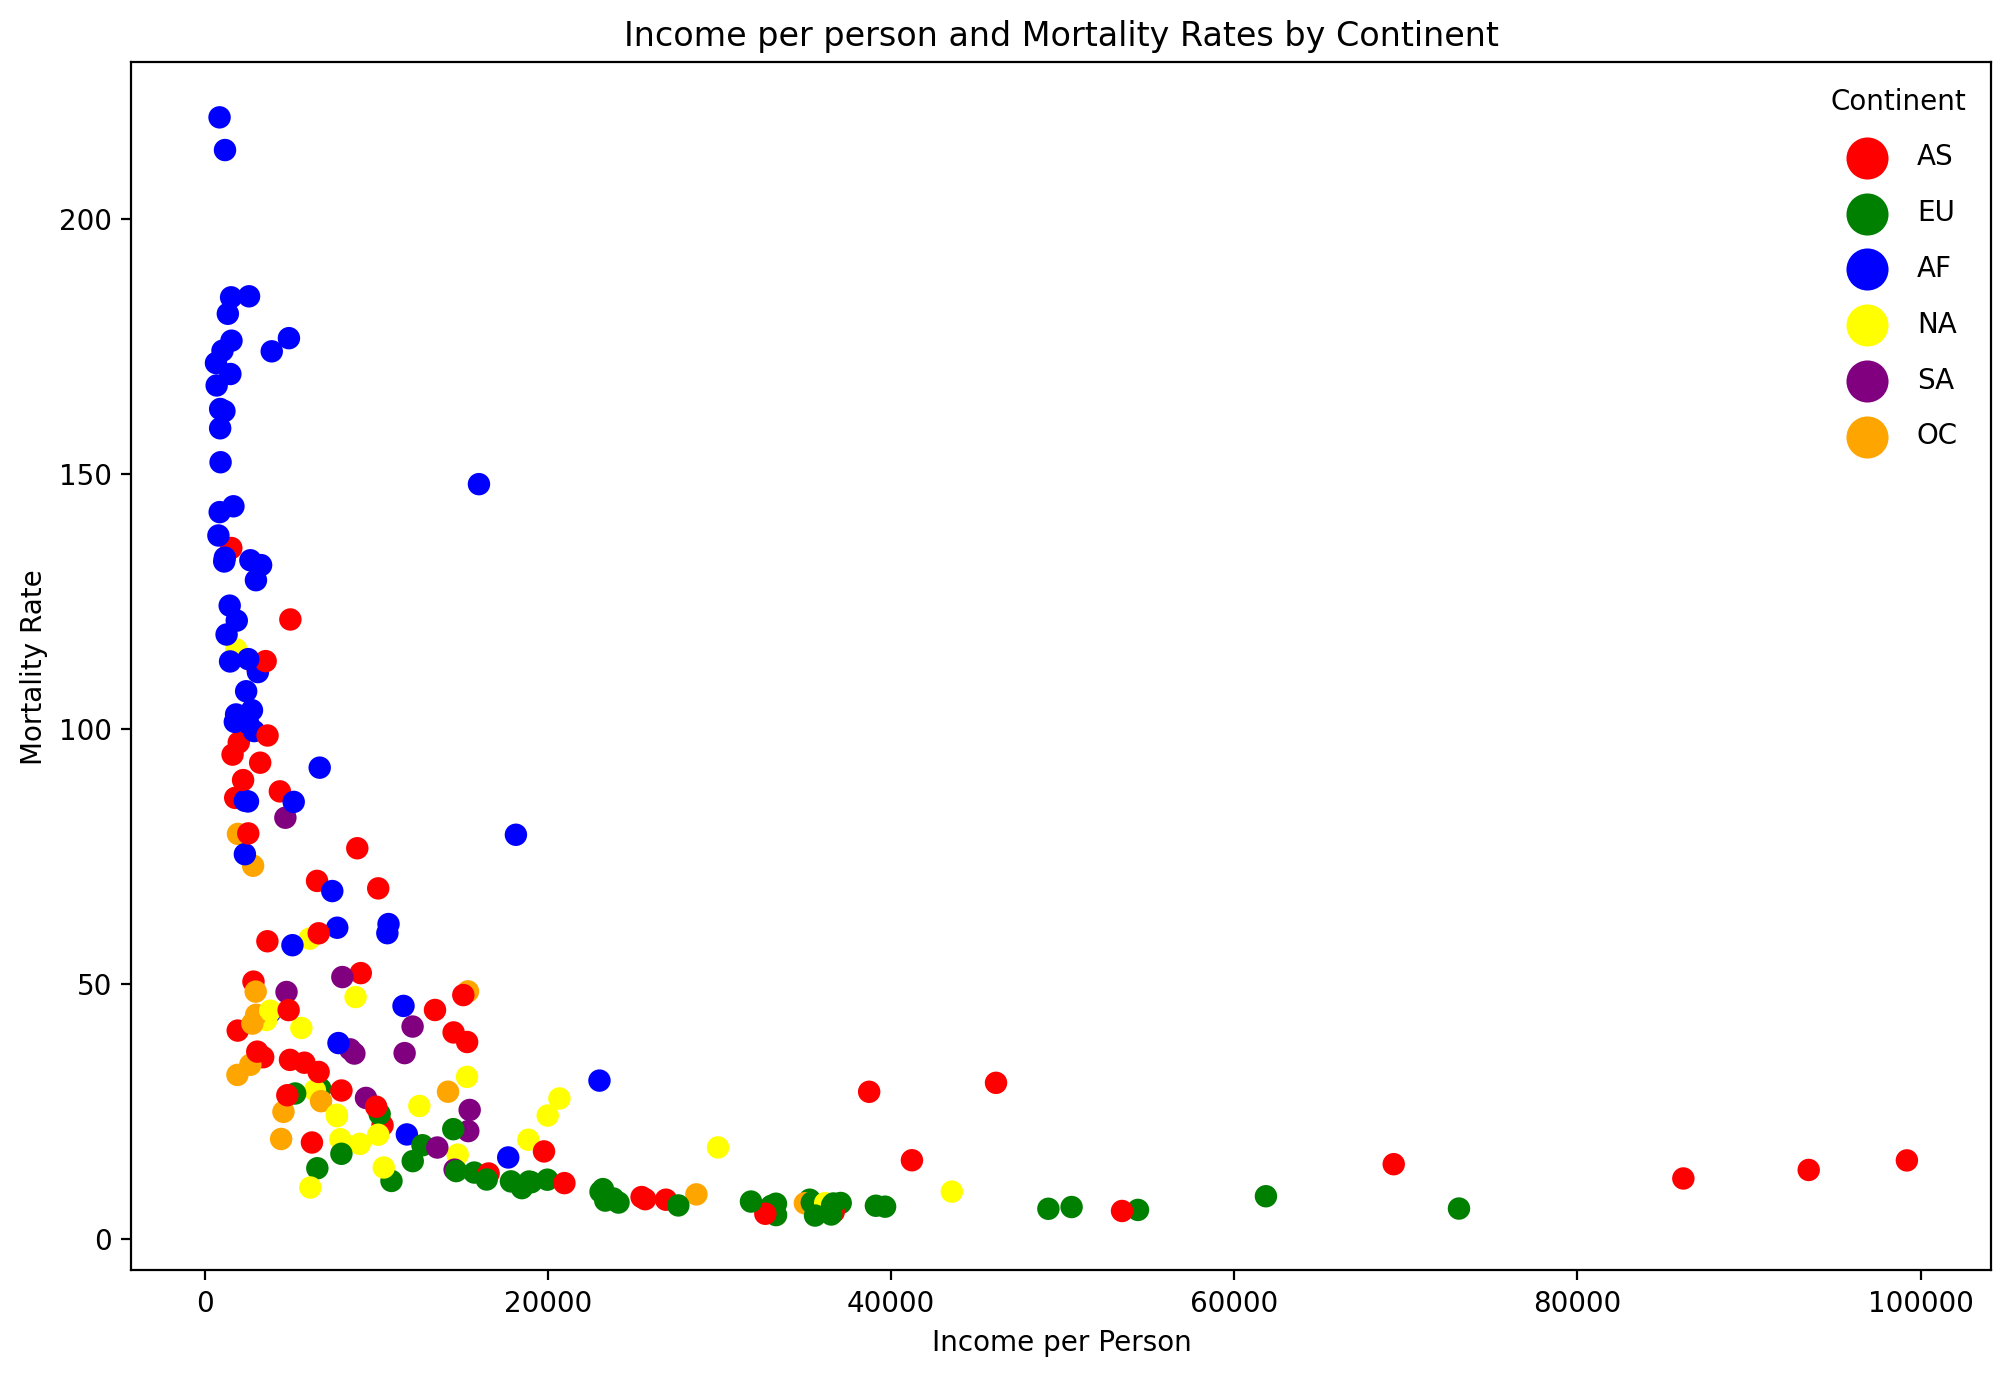

In [94]:
#Create the color map for continents
colors = {'AS':'red', 'EU':'green', 'AF':'blue', 'NA':'yellow', 'SA': 'purple', 'OC': 'orange'}
#Set the scatter plot size
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})

fig, ax = plt.subplots()
scatter = ax.scatter(x=income_corr['income per person'], y=income_corr['mortality rate'], s=50, c=income_corr['continent'].map(colors), label=None)

# set title and axis labels
plt.title('Income per person and Mortality Rates by Continent')
ax.set_xlabel('Income per Person')
ax.set_ylabel('Mortality Rate')

# produce a legend with the unique colors from the scatter
for continent in list(income_corr.continent.unique()):
    plt.scatter([], [], c=colors[continent], alpha=1, label=str(continent), s = 200)
    
legend1 = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Continent')


plt.show()

This plot shows a much tighter plot and a clearer negative correlating trend. Next we will run the correlation coefficients to get a better idea of the the relationships between these variables.

In [95]:
r = np.corrcoef(income_corr['income per person'], income_corr['mortality rate'])
print(r)

[[ 1.         -0.54454031]
 [-0.54454031  1.        ]]


In [96]:
income_corr.groupby('continent')[['income per person','mortality rate']].corr()

income per person  mortality rate
continent                                                     
AF        income per person           1.000000       -0.627265
          mortality rate             -0.627265        1.000000
AS        income per person           1.000000       -0.550578
          mortality rate             -0.550578        1.000000
EU        income per person           1.000000       -0.696328
          mortality rate             -0.696328        1.000000
NA        income per person           1.000000       -0.502843
          mortality rate             -0.502843        1.000000
OC        income per person           1.000000       -0.605748
          mortality rate             -0.605748        1.000000
SA        income per person           1.000000       -0.815384
          mortality rate             -0.815384        1.000000

###  Question 4 Summary Observations:

Now that we have analyzed a little deeper we can see that there are some relationships here between income per person and child mortality rates. Overall there is a moderate relationship between the two variables with **r = -0.54.**

When we run the correlation coeffient by continent we get a better look at how these two variables relate.

EU and SA have moderate to strong negative correlation coefficient, indicating that income per person has a relationship with child mortality rates. The rest of the continents show moderate negative correlations, further strengthening the relationship worldiwde. South America shows the highest correlation with an r of -0.81.

Next we will see if there is a relationship between a countries population and the child mortality rate.

# Question 5: Do countries with higher or lower populations have higher mortality rates?

We will start by running the same covert function on the population column to ensure the entries are correct.

In [97]:
df_all.head()

,country,year,mortality rate,income per person,population
0,Afghanistan,1980,238.0,2260,13200000
1,Afghanistan,1981,231.0,2500,12900000
2,Afghanistan,1982,225.0,2650,12500000
3,Afghanistan,1983,218.0,2620,12200000
4,Afghanistan,1984,211.0,2550,11900000


In [98]:
#grouping data for plotting
pop_group = df_all.groupby(('country'), as_index=False)[['mortality rate', 'population']].mean()

In [99]:
pop_group.head()

,country,mortality rate,population
0,Afghanistan,135.461538,2.218205e+07
1,Albania,29.433077,3.034359e+06
2,Algeria,45.679487,3.102564e+07
3,Andorra,7.687436,6.609741e+04
4,Angola,176.602564,1.781641e+07


We need to convert the population column to an int data type so we can better visualize the data.

In [100]:
#casting population to int type
pop_group['population'] = pop_group['population'].astype(int)

Now we can create the bins for our plot. I decided to group the populations in groups of 10 million to reduce the amount of values. I will run a function to create my bins.

In [101]:
def add_bins(df, span = 10000000, start_value = None, end_value = None):
    
    #if no values are specified, take the min and max populations
    if start_value == None:
        start_value = min(pop_group['population'])
        
    if end_value == None:
        end_value = max(pop_group['population'])
    
    #create the edges of the bins
    bin_edges = [x for x in range(start_value,end_value, span)]
    bin_edges.append(end_value)
    bin_edges[0] = bin_edges[0] - 1
    
    bin_names = []
    
    #join the bins separated by a '-'
    for i, x in enumerate(bin_edges):
        try:
            bin_names.append(" - ".join([str(bin_edges[i] + 1), str(bin_edges[i+1])]))
        except:
            pass
        
    #create and add the "bins" column to the given df     
    pop_group["bins"] = pd.cut(pop_group["population"], bin_edges, labels = bin_names)
    
    return bin_edges, bin_names, start_value, end_value

In [102]:
add_bins(pop_group)

([9641,
  10009642,
  20009642,
  30009642,
  40009642,
  50009642,
  60009642,
  70009642,
  80009642,
  90009642,
  100009642,
  110009642,
  120009642,
  130009642,
  140009642,
  150009642,
  160009642,
  170009642,
  180009642,
  190009642,
  200009642,
  210009642,
  220009642,
  230009642,
  240009642,
  250009642,
  260009642,
  270009642,
  280009642,
  290009642,
  300009642,
  310009642,
  320009642,
  330009642,
  340009642,
  348217179],
 ['9642 - 10009642',
  '10009643 - 20009642',
  '20009643 - 30009642',
  '30009643 - 40009642',
  '40009643 - 50009642',
  '50009643 - 60009642',
  '60009643 - 70009642',
  '70009643 - 80009642',
  '80009643 - 90009642',
  '90009643 - 100009642',
  '100009643 - 110009642',
  '110009643 - 120009642',
  '120009643 - 130009642',
  '130009643 - 140009642',
  '140009643 - 150009642',
  '150009643 - 160009642',
  '160009643 - 170009642',
  '170009643 - 180009642',
  '180009643 - 190009642',
  '190009643 - 200009642',
  '200009643 - 210009642',
 

Now that we have added the bins to the dataframe we need to check that all of these bins have values, as some of these bins may not have any mortality rate values. Firt we will group the dataframe by the bins and the average mortality rates and then check for NaNs.

In [103]:
#create new dataframe to hold only the grouped bins and mortality rate data
bin_group = pop_group.groupby(('bins'), as_index=False)[['mortality rate']].mean()

In [104]:
bin_group.head()

,bins,mortality rate
0,9642 - 10009642,50.939118
1,10009643 - 20009642,80.348727
2,20009643 - 30009642,58.476868
3,30009643 - 40009642,45.752527
4,40009643 - 50009642,37.175128


In [105]:
#check dataframe for NaN values
bin_group['mortality rate'].isna()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11     True
12    False
13     True
14    False
15     True
16     True
17    False
18     True
19     True
20     True
21    False
22     True
23     True
24     True
25     True
26     True
27     True
28    False
29     True
30     True
31     True
32     True
33     True
34    False
Name: mortality rate, dtype: bool

There are some NaN values here where the population bin does not have any value. We will remove these bins next, and sort the data frame from smallest to largest populations

In [106]:
bin_group = bin_group.dropna(axis=0, how='any')
bin_group.sort_values(by=['bins'], ascending = True, inplace = True)
bin_group.head()

,bins,mortality rate
0,9642 - 10009642,50.939118
1,10009643 - 20009642,80.348727
2,20009643 - 30009642,58.476868
3,30009643 - 40009642,45.752527
4,40009643 - 50009642,37.175128


Now we are ready to plot this data. We will plot using a line plot to get a better visual of the data.

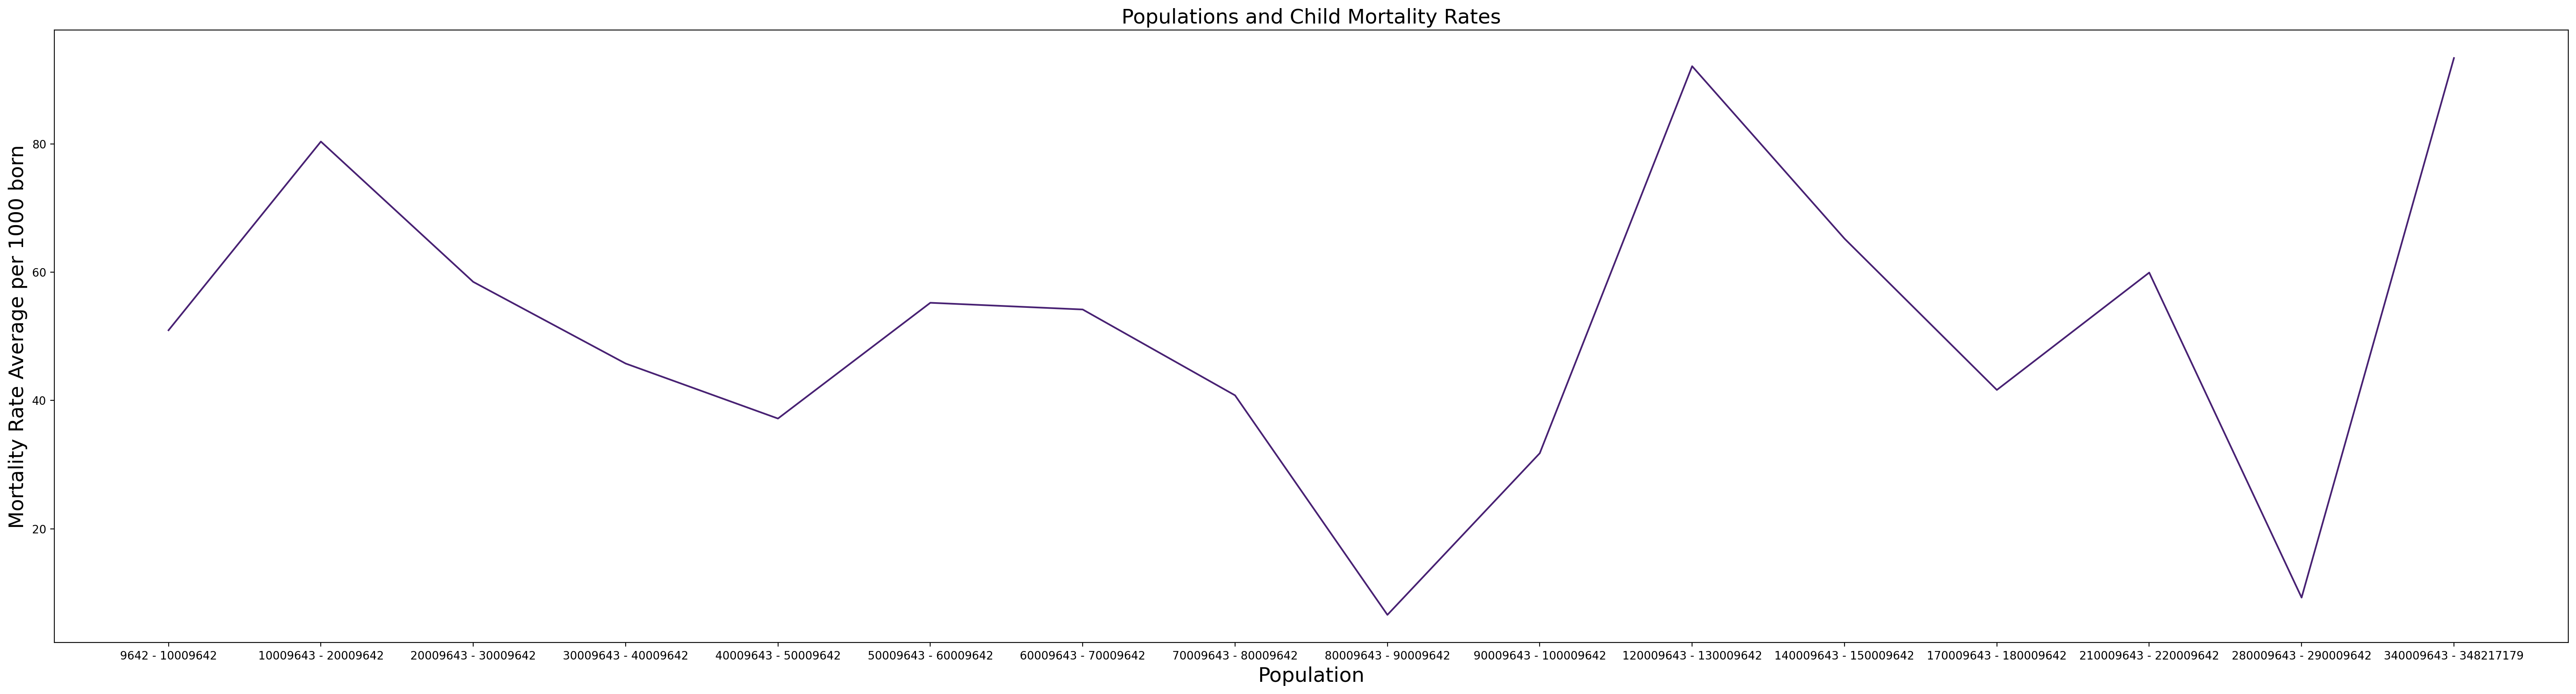

In [107]:
plt.figure(figsize=(40,10), dpi = 100)

#on x-axis
plt.xlabel('Years', fontsize = 18)
#on y-axis
plt.ylabel('Mortality Rate Average per 1000 born', fontsize = 18)
plt.xlabel('Population', fontsize = 18)
#title of the line plot
plt.title('Populations and Child Mortality Rates', fontsize=18)

#plotting the graph
plt.plot(bin_group['bins'], bin_group['mortality rate'])

#displaying the line plot
plt.show()

### Observation:

From our plot we can easily see that there is no relationship at all in population sizes and child mortality rates. Though we will create one more plot to check the entirety of this relationship. We will use our original population dataframe before it was grouped into the bins to create a scatter plot of all the population values.

In [108]:
pop_group.head()

,country,mortality rate,population,bins
0,Afghanistan,135.461538,22182051,20009643 - 30009642
1,Albania,29.433077,3034358,9642 - 10009642
2,Algeria,45.679487,31025641,30009643 - 40009642
3,Andorra,7.687436,66097,9642 - 10009642
4,Angola,176.602564,17816410,10009643 - 20009642


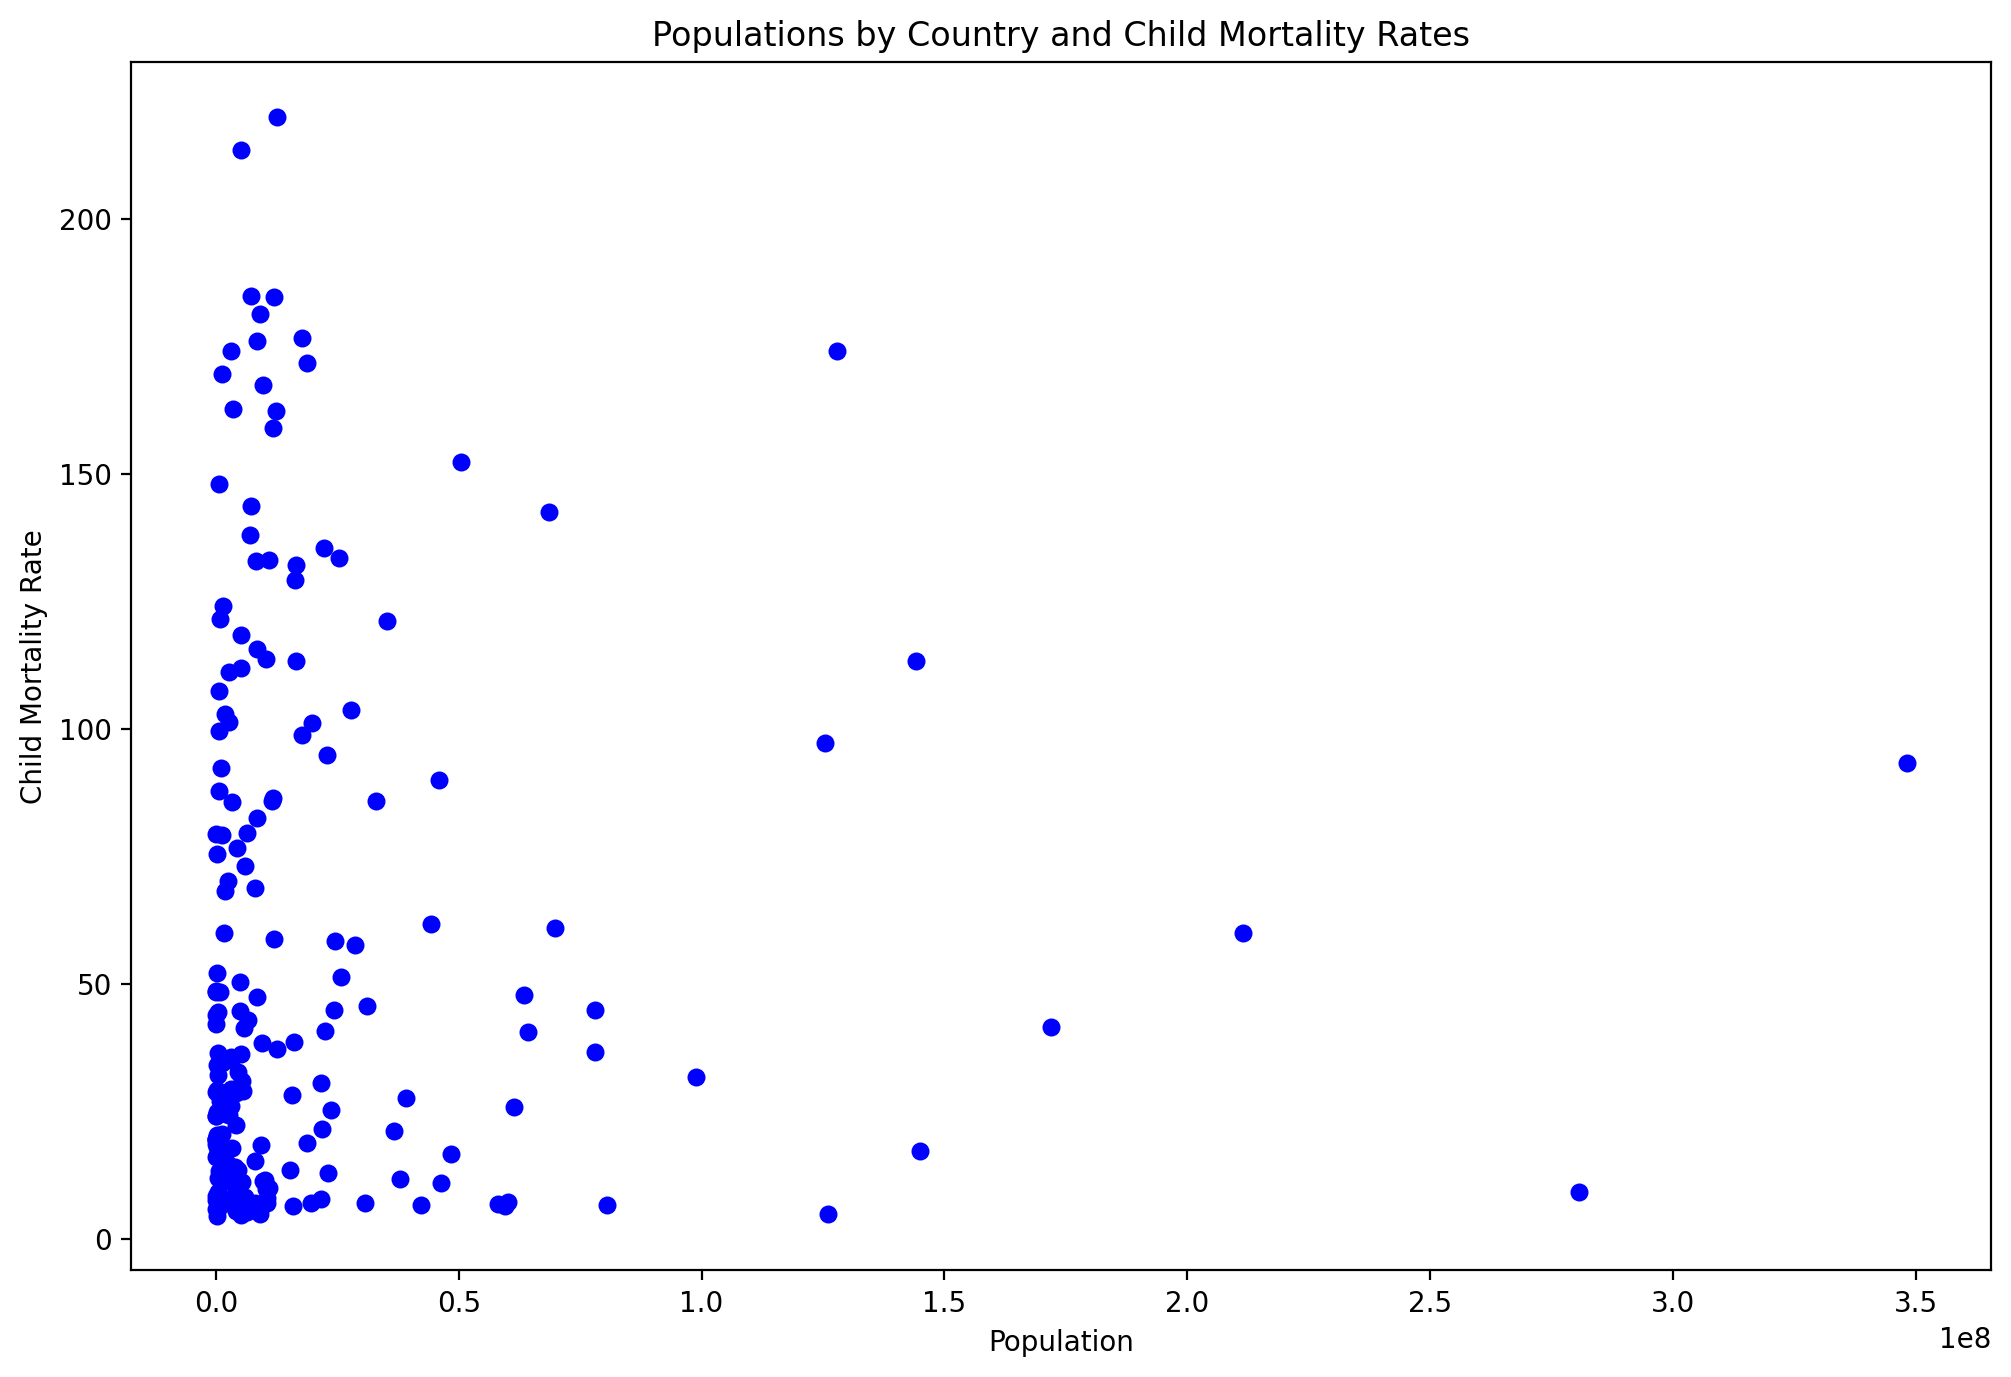

In [109]:
#Set the scatter plot size
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})

fig, ax = plt.subplots()
scatter = ax.scatter(x=pop_group['population'], y=income_corr['mortality rate'], s=30, c='blue', label=None)

# set title and axis labels
plt.title('Populations by Country and Child Mortality Rates')
ax.set_xlabel('Population')
ax.set_ylabel('Child Mortality Rate')



plt.show()

In [110]:
r = np.corrcoef(pop_group['population'], pop_group['mortality rate'])
print(r)

[[1.       0.028898]
 [0.028898 1.      ]]


### Observation:

From this scatter and checking the r = 0.02 we can safely say there is no relationship between child mortality rates and population size. 

# Conclusions

In summary analyzing these datasets from Gapminder was an exciting process and the answers to the questions were very interesting.

## The discussed questions were:

**How did the child mortality rate change over the years?**

The plotted data over child mortality rate over the years shows a clear decline in child mortality over time. I analyed years 1990 - 2018 which represents the years of data that Gapminder used to model the interpolations in the rest of the dataset.
    
**Which countries hold the highest rates of mortality?**

The plotted data gave us a list of the 10 highest countries and their mortality rates. Those countires and their child mortality rates on average were:
    
1. Niger           223.565789

2. Sierra Leone    216.421053

3. South Sudan     187.107895

4. Mali            186.968421

5. Chad            183.078947

6. Angola          179.289474

7. Guinea          178.184211

8. Liberia         176.902632

9. Nigeria         175.526316

10. Mozambique      174.392105**

**Does government share of health care spending have an effect on the mortality rate?**

From our plot and analysis of this data, we could observe that there is a weak-moderate relationship between government spending and child mortality rates. A further analysis of the correlation by continent have a clearer reprentation of where the relationship may be stronger and weaker between the continents. The overall correlation is -0.47
    
**Highest:
    EU	spending rate	1.000000	-0.697386
    mortality rate	-0.697386	1.000000
Lowest:
    OC	spending rate	1.000000	0.353164
    mortality rate	0.353164	1.000000**

**Is there a relationship between income and child mortality?**

From our plot and analysis of this data, we could observe that there is a moderate-strong relationship between income per person and child mortality rates, stronger than the government spending relationshio. A further analysis of the correlation by continent have a clearer reprentation of where the relationship may be stronger and weaker between the continents. The overall correlation is -0.54

**Highest:
    SA	income per person	1.000000	-0.808955
    mortality rate	-0.808955	1.000000
Lowest:
    NA	income per person	1.000000	-0.501759
    mortality rate	-0.501759	1.000000**

**Do countries with higher or lower populations have higher mortality rates?**
   
From this analysis we saw that there is no relationship that exists between a countries population and their child mortality rate. The correlation is 0.02 indicating the absense of a relationship.

# Limitations

I had a few limitations within the datasets that required me to reduce the sets. The government spending dataset was missing a good amount of data and I was only able to analyze 7 years of data between 2001-2008. Upon further cleaning I ended up needing to drop 9 countries from the analysis as they were all missing 8 entries within the already limited time frame.

North Korea         8
Zimbabwe            8
Liechtenstein       8
South Sudan         8
Holy See            8
Hong Kong, China    8
Somalia             8
Taiwan              8
Palestine           8

# Further Analysis

There are more variables that I would like to compare to the child mortality rate for further explanations. A few questions I would explore are:

* What are the top causes of child deaths under 5 years of age?
* Is there a relationship between children who are underweight and child mortality rates?
* Do countries that have a higher rate of natural disasters have a higher child mortality rate?

I would also explore Africa, which has the most countries with the highest child mortality rate and work to indentify variables that could provide insight into why that is.
